# Analyse Exploratoire

### Import des modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap

### Analyse Exploratoire

In [2]:
# Chargement de données
building_consumption = pd.read_csv("data/2016_Building_Energy_Benchmarking.csv")

In [3]:
# Suppression des doublants
building_consumption.drop_duplicates(subset=['OSEBuildingID'], inplace=True)

In [4]:
building_consumption.shape

(3376, 46)

In [5]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [6]:
# Pour les champs numériques on vérifie les sommes, moyennes, variances, etc ..
building_consumption.iloc[:, :27].describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
count                      1679.000000                      596.000000  
mean                      28444.075817                    11738.675166  
std                       54392.917928                    29331.199286  
min                           0.000000                        0.000000  
25%                        5000.000000                     2239.000000  
50%                       10664.000000                     5043.000000  
75%                       26640.000000                    10138.750000  
max                      686750.000000                   459748.000000

In [7]:
building_consumption.iloc[:, 27:].describe()

ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05   
50%             96.199997            101.099998         1.803753e+06   
75%            143.899994            148.349998         4.222455e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.370000e+03    3.367000e+03      3.367000e+03   
mean            5.276726e+06    2.745959e+05      1.086639e+06   
std             1.593879e+07    3.912173e+06      4.352478e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%             9.701822e+05    0.000000e+00      1.874229e+05   
50%             1.904452e+06    0.000000e+00      3.451299e+05   
75%             4.381429e+06    0.000000e+00      8.293178e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  Comments  \
count       3.367000e+03        3.367000e+03      3.367000e+03       0.0   
mean        3.707612e+06        1.368505e+04      1.368505e+06       NaN   
std         1.485066e+07        6.709781e+04      6.709781e+06       NaN   
min        -1.154170e+05        0.000000e+00      0.000000e+00       NaN   
25%         6.394870e+05        0.000000e+00      0.000000e+00       NaN   
50%         1.177583e+06        3.237538e+03      3.237540e+05       NaN   
75%         2.829632e+06        1.189033e+04      1.189034e+06       NaN   
max         6.570744e+08        2.979090e+06      2.979090e+08       NaN   

       TotalGHGEmissions  GHGEmissionsIntensity  
count        3367.000000            3367.000000  
mean          119.723971               1.175916  
std           538.832227               1.821452  
min            -0.800000              -0.020000  
25%             9.495000               0.210000  
50%            33.920000               0.610000  
75%            93.940000               1.370000  
max         16870.980000              34.090000

In [8]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [9]:
# Calcul de la proportion de valeurs manquantes par colonne

(building_consumption.isnull().mean().sort_values().round(4)* 100).astype(str)+"%"

OSEBuildingID                                      0.0%
PropertyGFABuilding(s)                             0.0%
PropertyGFAParking                                 0.0%
PropertyGFATotal                                   0.0%
NumberofFloors                                     0.0%
YearBuilt                                          0.0%
Longitude                                          0.0%
Latitude                                           0.0%
Neighborhood                                       0.0%
DefaultData                                        0.0%
CouncilDistrictCode                                0.0%
ComplianceStatus                                   0.0%
State                                              0.0%
City                                               0.0%
Address                                            0.0%
PropertyName                                       0.0%
PrimaryPropertyType                                0.0%
BuildingType                                    

In [10]:
# Affichage de nombre d'occurrence sur les types de données string
for column in building_consumption.select_dtypes(['object']).columns.values:
    print("--------------------------------------")    
    print(f"Colonne {column} \n")
    print(building_consumption[column].value_counts())
    print("--------------------------------------\n\n")

--------------------------------------
Colonne BuildingType 

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64
--------------------------------------


--------------------------------------
Colonne PrimaryPropertyType 

Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Sel

In [11]:
building_consumption['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [12]:
non_residential_buildings_dict = ["NonResidential", 
                             "SPS-District K-12", 
                             "Nonresidential COS", 
                             "Campus", 
                             "Nonresidential WA"]

In [13]:
building_consumption["IsNotResidential"] = building_consumption["BuildingType"].apply(lambda x: True if x in non_residential_buildings_dict else False)

In [14]:

building_consumption['IsNotResidential'].value_counts()

False    1708
True     1668
Name: IsNotResidential, dtype: int64

In [15]:
noresidential_buiding_count = building_consumption.loc[building_consumption['IsNotResidential']==True]["BuildingType"].value_counts()

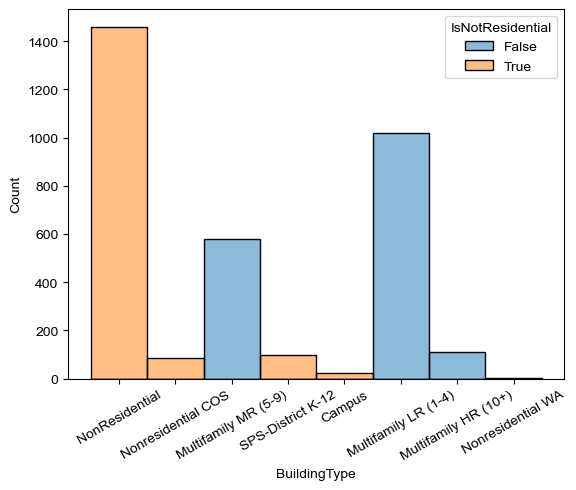

In [16]:
# Affichage de distribution des types de bâtiments
sns.histplot(data=building_consumption, x="BuildingType", hue="IsNotResidential")
sns.set_theme(style="whitegrid", palette="pastel")
plt.xticks(rotation=30)
plt.show()

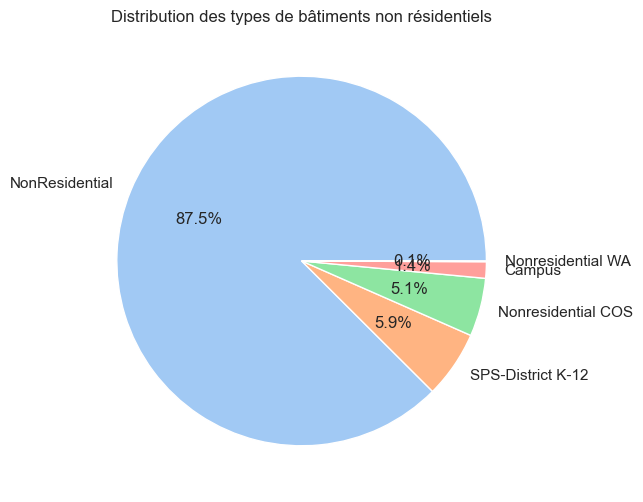

In [17]:
# Graphique de distribution des types de bâtiments non résidentiels
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(noresidential_buiding_count.values, labels=noresidential_buiding_count.keys(), autopct='%1.1f%%')
plt.title('Distribution des types de bâtiments non résidentiels')
plt.show()

In [18]:
# Selection des bâtiments non résidentiels
building_consumption = building_consumption.loc[(building_consumption["IsNotResidential"]== True)] 
building_consumption = building_consumption.drop(columns=["IsNotResidential"])
building_consumption.shape

(1668, 46)

In [19]:
# Changement des colonnes en type string
building_consumption["ZipCode"] = building_consumption["ZipCode"].astype(str)
building_consumption["CouncilDistrictCode"] = building_consumption["CouncilDistrictCode"].astype(str)
building_consumption["YearBuilt"] = building_consumption["YearBuilt"].astype(str)

In [20]:
def show_indicators(df, indicator):
    print(f"Analyse sur l'indicateur {indicator}")
    plt.figure(figsize=(10,6))
    sns.set_theme()
    sns.histplot(df[indicator], kde=True)
    plt.show()

    print(f"La moyenne est {df[indicator].mean()}")
    print(f"L'écart type est {df[indicator].std()}")
    print(f"La médiane est {df[indicator].median()}")
    print(f"Le Skewness empirique est {df[indicator].skew()}")

    if df[indicator].skew() == 0:
        print(f"La distribution de l'indicateur \"{indicator}\" est symétrique")
    elif df[indicator].skew() > 0:
        print(f"La distribution de l'indicateur \"{indicator}\" est étalée à droite")
    else:
        print(f"La distribution de l'indicateur \"{indicator}\" est étalée à gauche")
        
    print(f"Le kurtosis est {df[indicator].kurtosis()}")

    if df[indicator].kurtosis() == 0:
        print(f"La distribution de l'indicateur \"{indicator}\" a le même aplatissement que la distribution normale")
    elif df[indicator].kurtosis() > 0:
        print(f"La distribution de l'indicateur \"{indicator}\" est moins aplatie que la distribution normale : les observations sont plus concentrées")
    else:
        print(f"La distribution de l'indicateur \"{indicator}\" est plus aplatie")

    plt.figure(figsize=(10,6))
    sns.set_theme()
    sns.boxplot(data=df, x=indicator)
    plt.show()

In [21]:
def show_string_distribution(df, column, number_limit):
    print(f"Analyse sur l'indicateur {column}")
    plt.figure(figsize=(10,6))
    sns.set_theme()

    # Obtenir les N catégories les plus fréquentes
    top_categories = df[column].value_counts().nlargest(number_limit).index

    
    # Création du countplot de base
    ax =  sns.countplot(data=df, y=column, order=top_categories)
    
    # Ajout des valeurs au-dessus des barres
    for i in ax.containers:
        ax.bar_label(i)
        
    df_count = df[column].value_counts()

    sns.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(df_count.values, labels=df_count.keys(), autopct='%1.1f%%')
    plt.title(f"Distribution de {column}")

    plt.show()

In [22]:
string_columns = building_consumption.select_dtypes(['object']).columns.values

In [23]:
string_columns = ["BuildingType",
                 "PrimaryPropertyType",
                 "ZipCode",
                 "CouncilDistrictCode",
                 "Neighborhood",
                 "YearBuilt",
                 "LargestPropertyUseType",
                 "SecondLargestPropertyUseType",
                 "ThirdLargestPropertyUseType",
                 "YearsENERGYSTARCertified",
                 "ComplianceStatus",
                 "Outlier"]

Analyse sur l'indicateur BuildingType


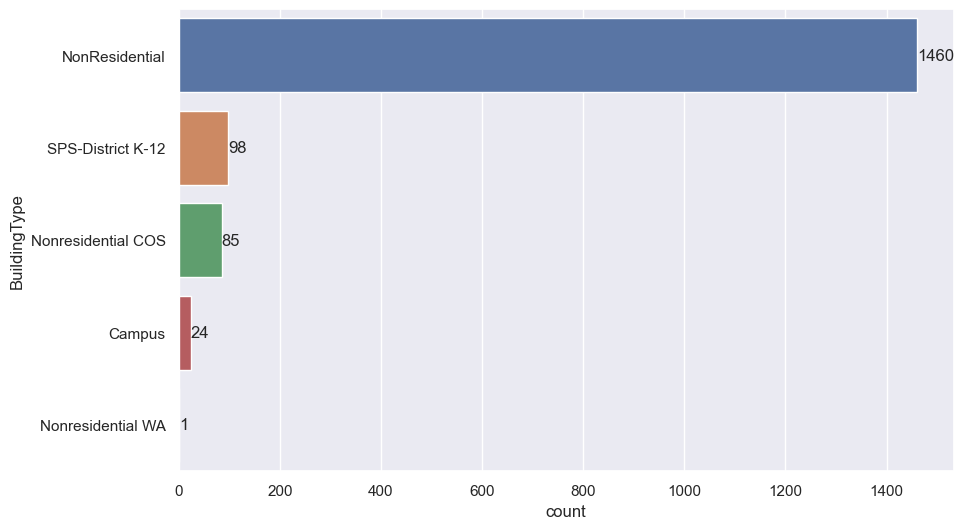

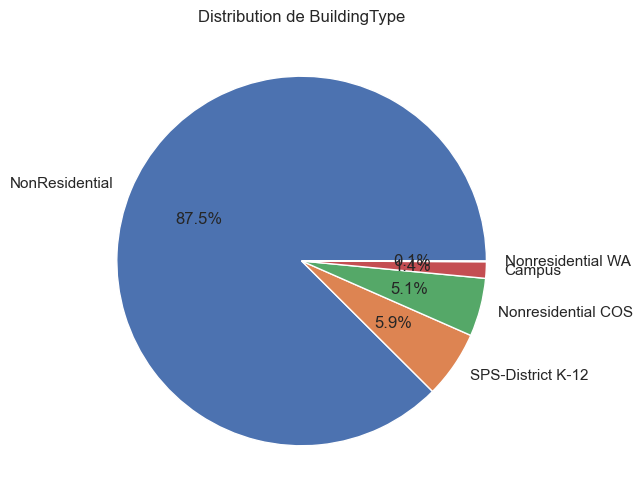

Analyse sur l'indicateur PrimaryPropertyType


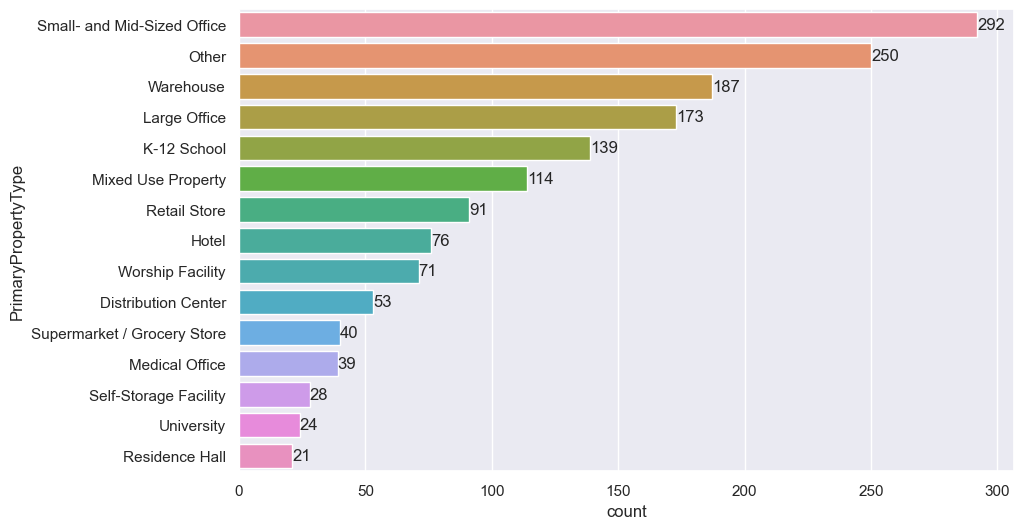

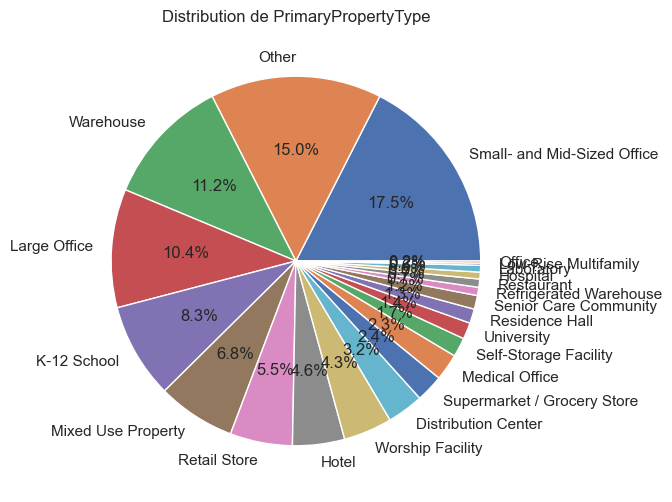

Analyse sur l'indicateur ZipCode


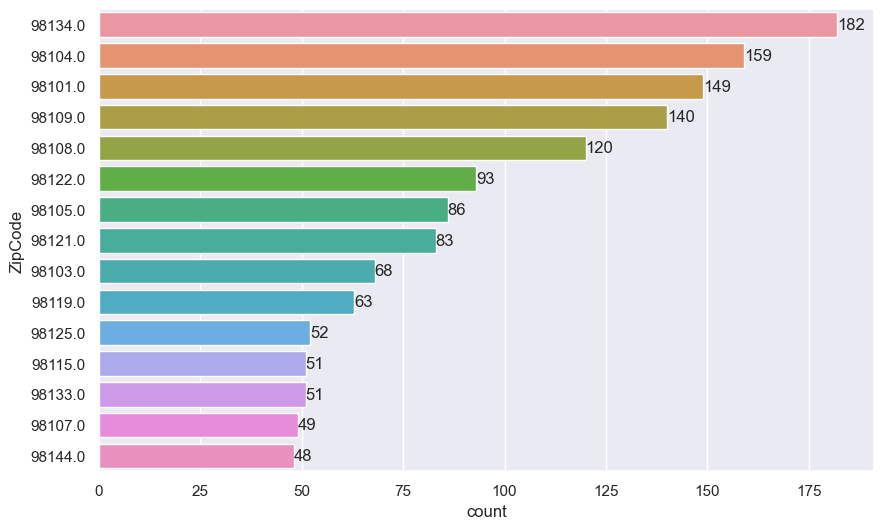

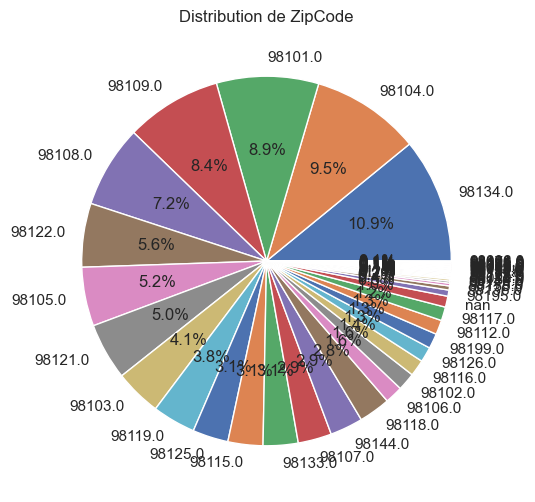

Analyse sur l'indicateur CouncilDistrictCode


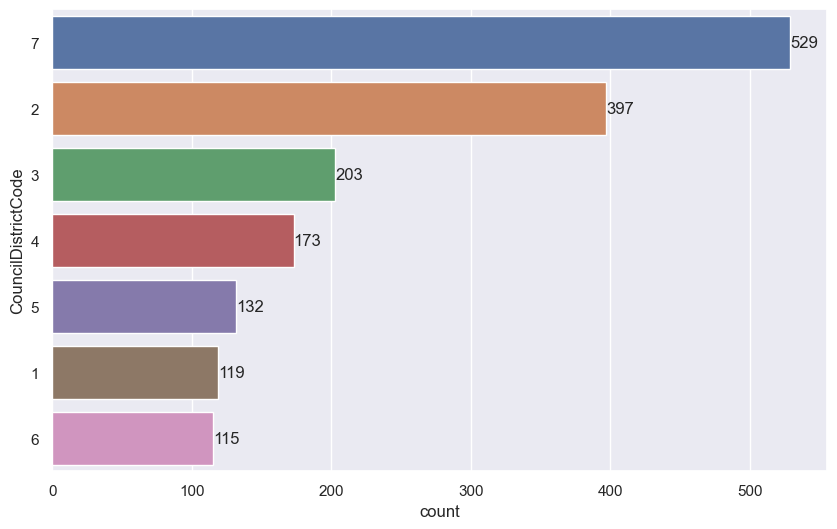

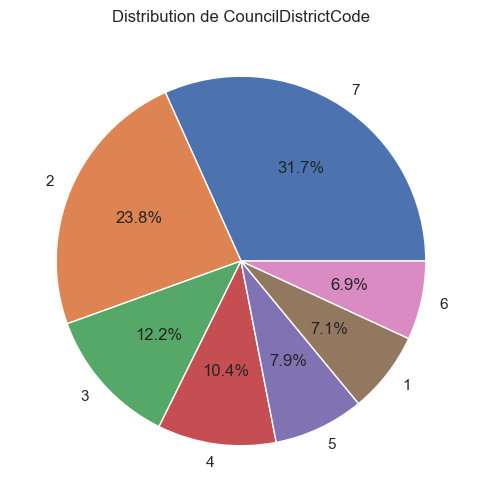

Analyse sur l'indicateur Neighborhood


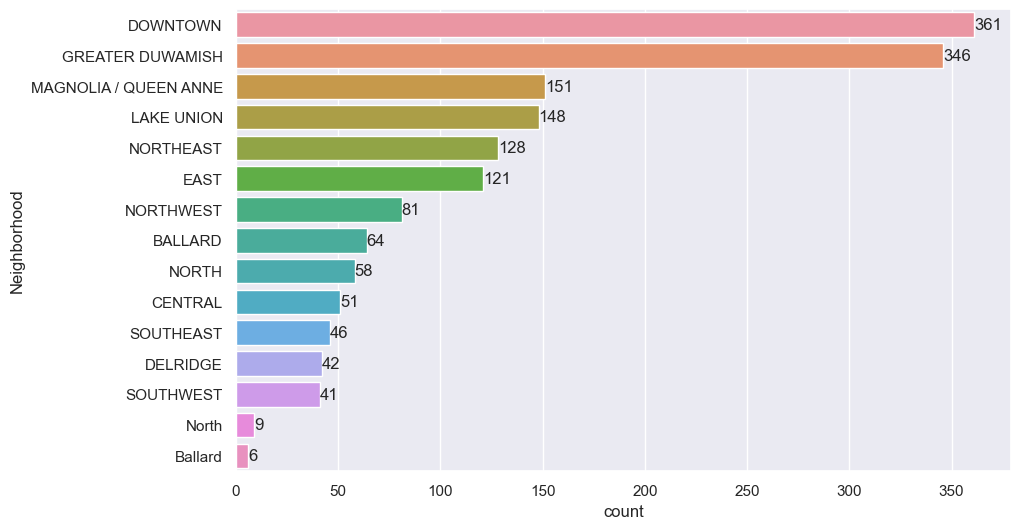

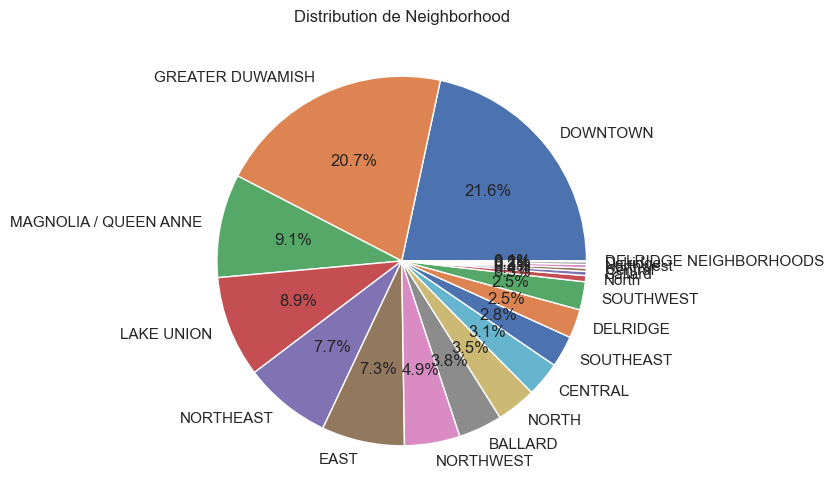

Analyse sur l'indicateur YearBuilt


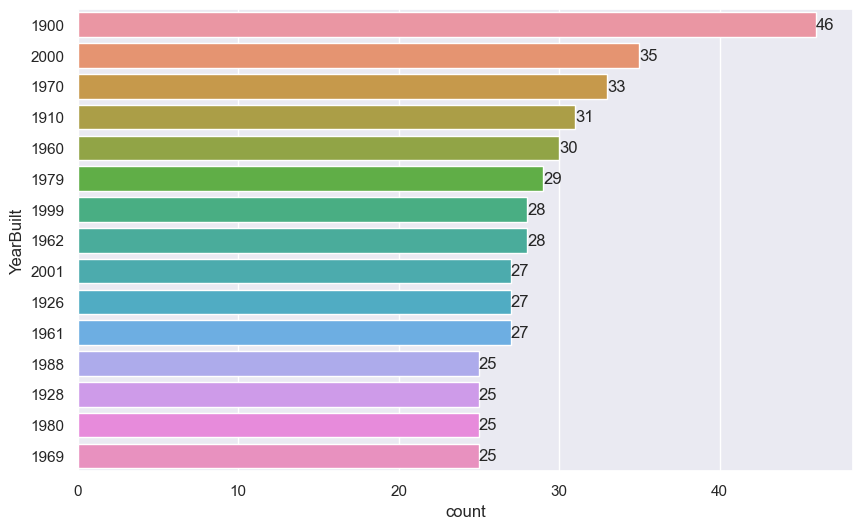

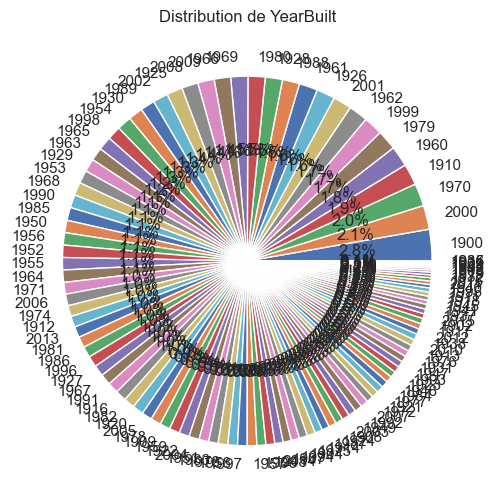

Analyse sur l'indicateur LargestPropertyUseType


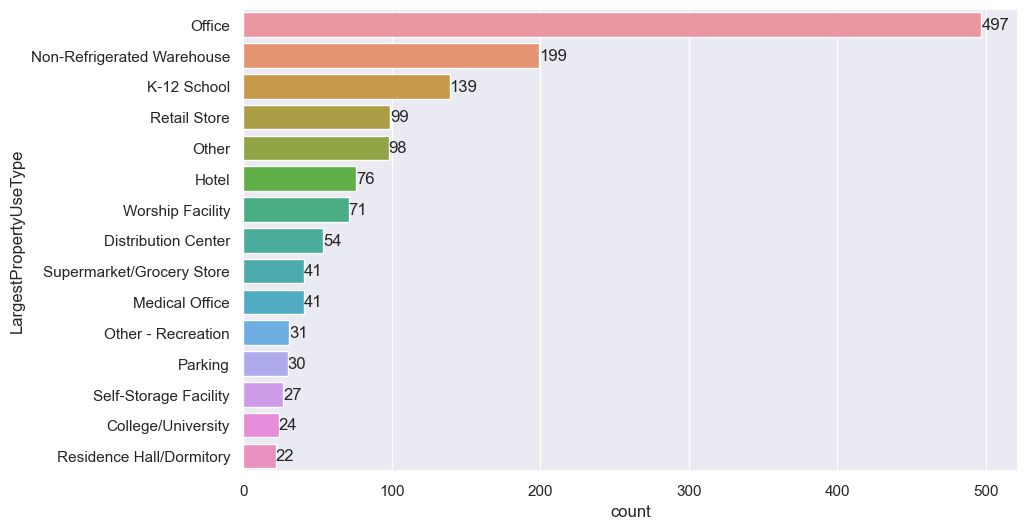

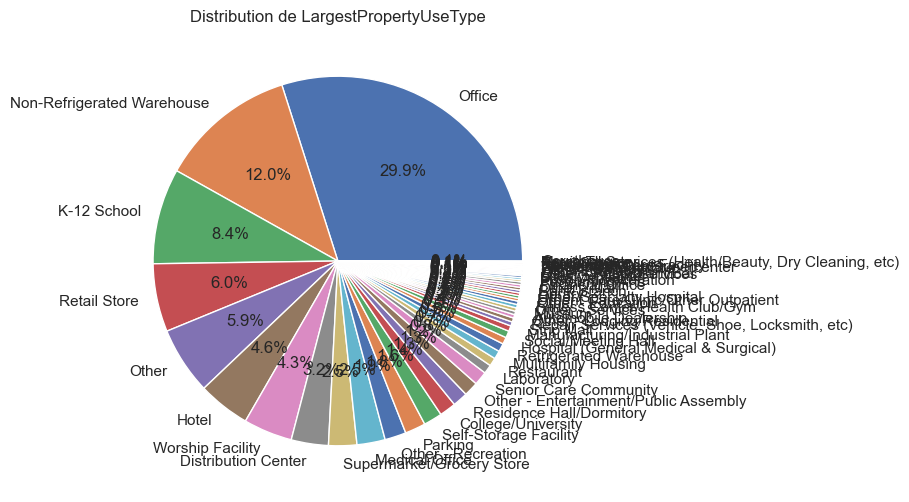

Analyse sur l'indicateur SecondLargestPropertyUseType


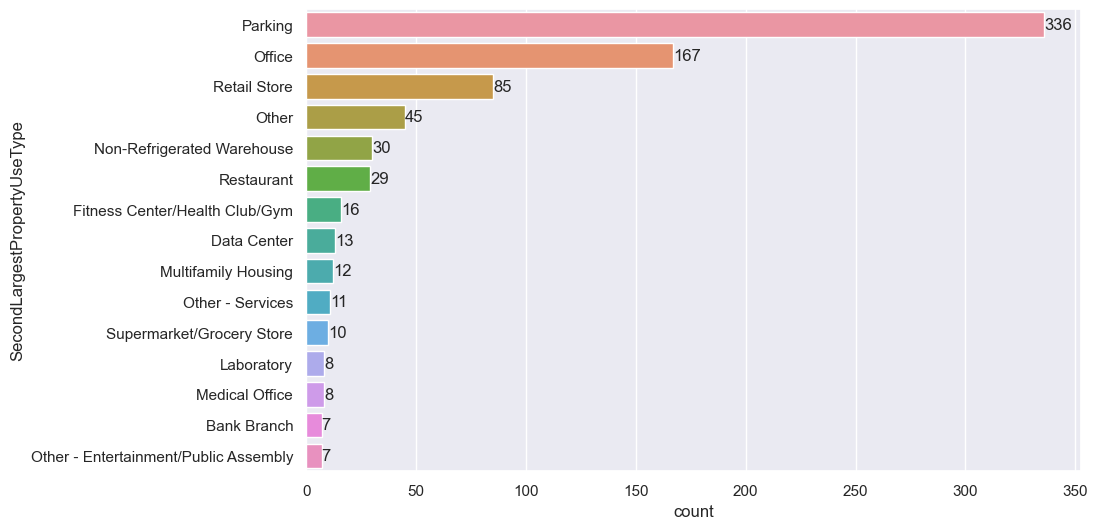

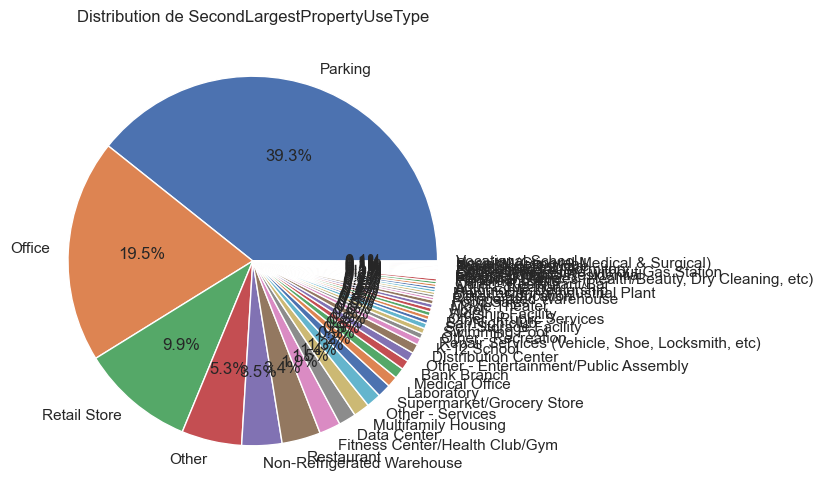

Analyse sur l'indicateur ThirdLargestPropertyUseType


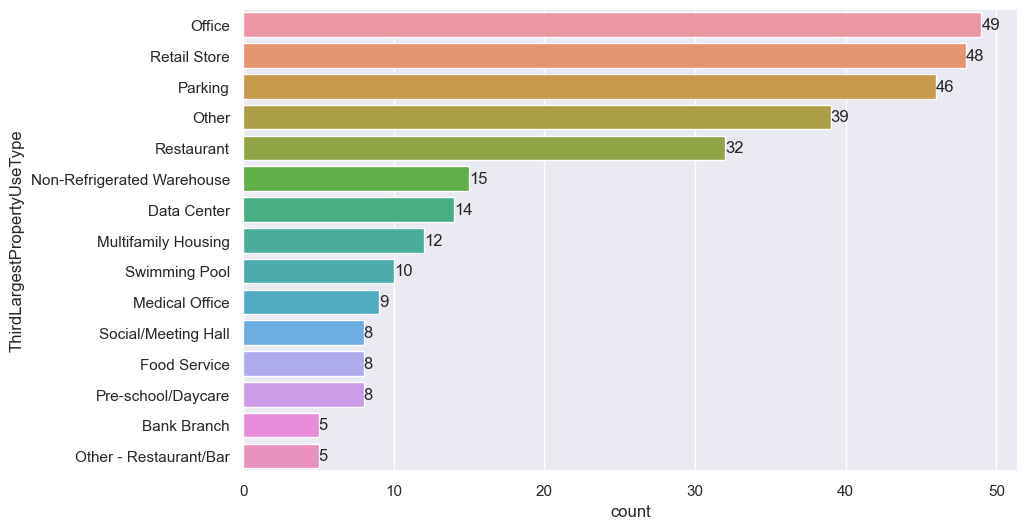

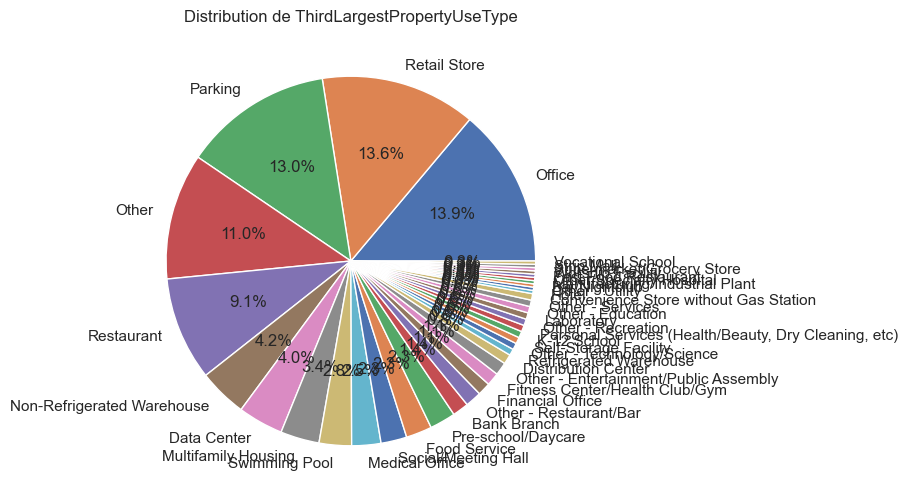

Analyse sur l'indicateur YearsENERGYSTARCertified


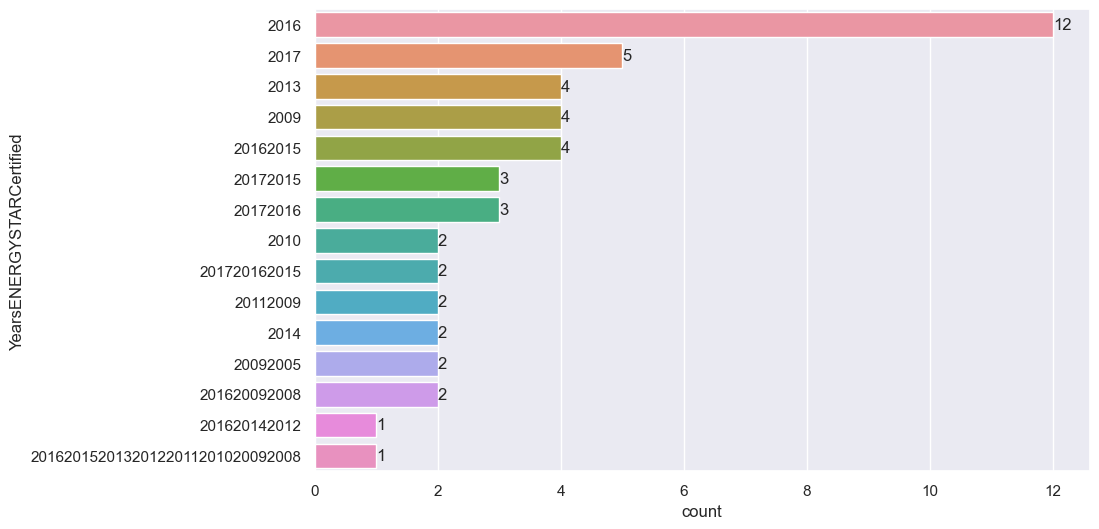

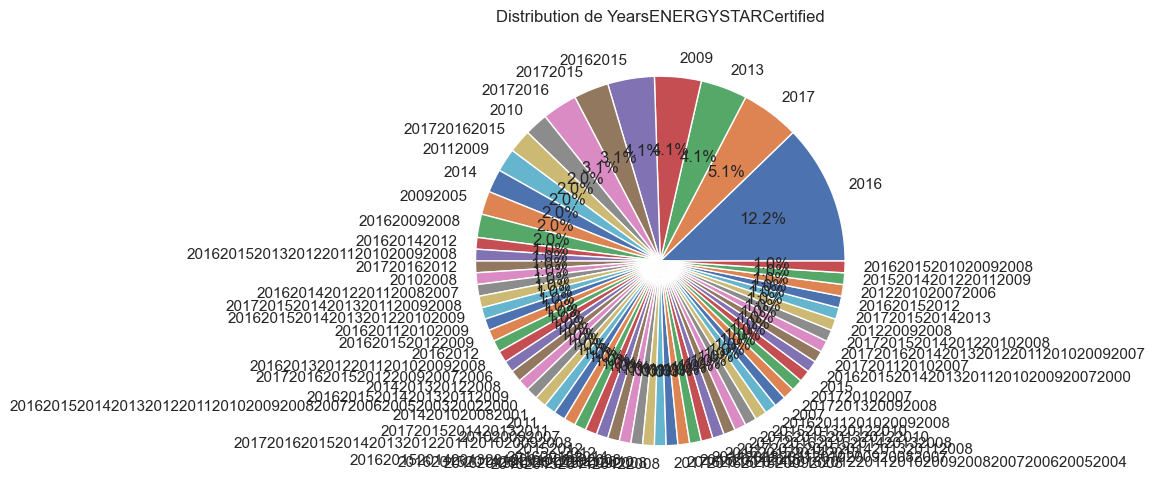

Analyse sur l'indicateur ComplianceStatus


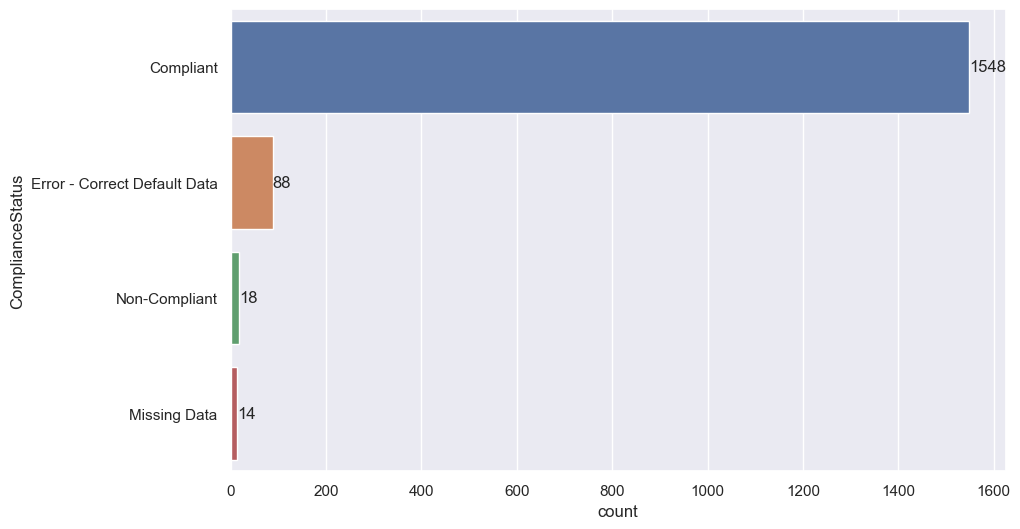

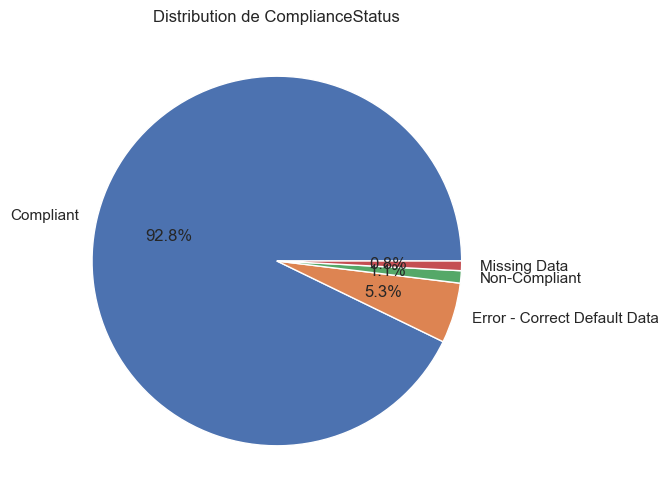

Analyse sur l'indicateur Outlier


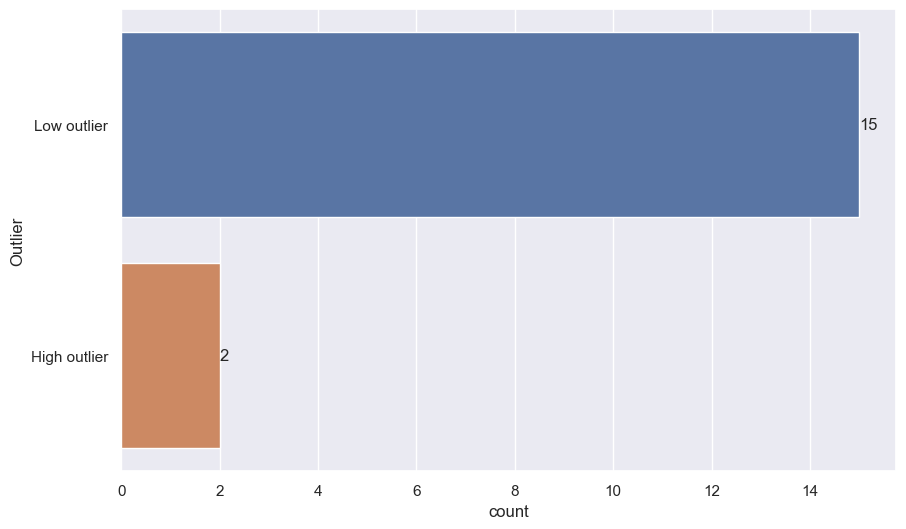

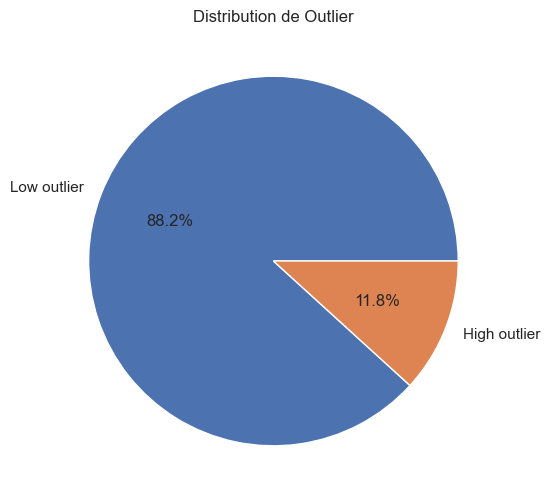

In [24]:
for column in string_columns:
    show_string_distribution(building_consumption, column, 15)

In [25]:
numerical_columns = building_consumption.select_dtypes(exclude=["object", "bool"]).columns.values

In [26]:
numerical_columns 

array(['OSEBuildingID', 'DataYear', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype=object)

In [27]:
numerical_columns = ['NumberofBuildings', 
                     'NumberofFloors', 
                     'PropertyGFATotal',
                     'PropertyGFAParking', 
                     'PropertyGFABuilding(s)',
                     'LargestPropertyUseTypeGFA', 
                     'SecondLargestPropertyUseTypeGFA',
                     'ThirdLargestPropertyUseTypeGFA', 
                     'ENERGYSTARScore',
                     'SiteEUI(kBtu/sf)', 
                     'SiteEUIWN(kBtu/sf)',
                     'SourceEUI(kBtu/sf)',
                     'SourceEUIWN(kBtu/sf)', 
                     'SiteEnergyUse(kBtu)',
                     'SiteEnergyUseWN(kBtu)', 
                     'SteamUse(kBtu)', 
                     'Electricity(kWh)',
                     'Electricity(kBtu)', 
                     'NaturalGas(therms)', 
                     'NaturalGas(kBtu)',
                     'TotalGHGEmissions', 
                     'GHGEmissionsIntensity']

Analyse sur l'indicateur NumberofBuildings


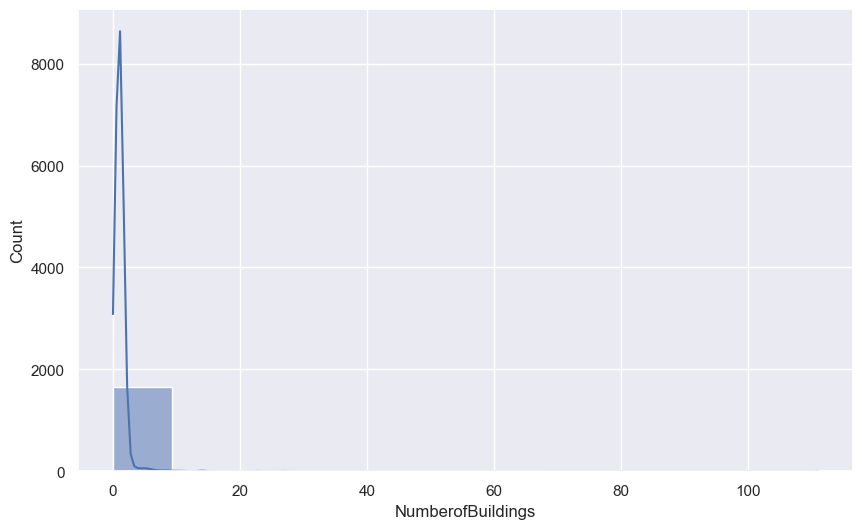

La moyenne est 1.1686674669867947
L'écart type est 2.931408504607799
La médiane est 1.0
Le Skewness empirique est 32.48164551106041
La distribution de l'indicateur "NumberofBuildings" est étalée à droite
Le kurtosis est 1190.9827360378092
La distribution de l'indicateur "NumberofBuildings" est moins aplatie que la distribution normale : les observations sont plus concentrées


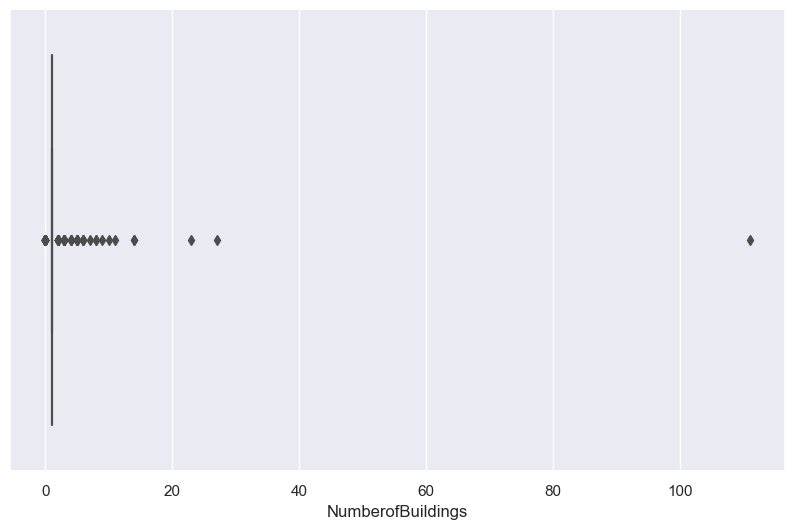

Analyse sur l'indicateur NumberofFloors


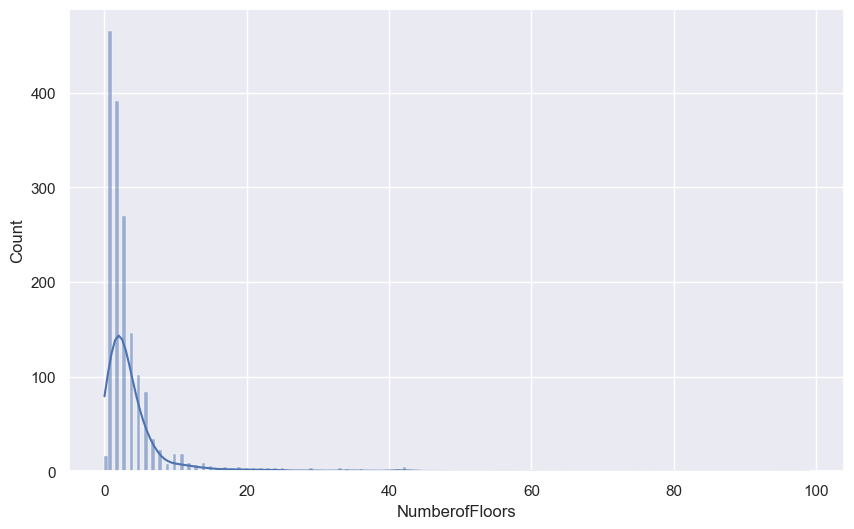

La moyenne est 4.121103117505995
L'écart type est 6.56340663381679
La médiane est 2.0
Le Skewness empirique est 6.044132952456066
La distribution de l'indicateur "NumberofFloors" est étalée à droite
Le kurtosis est 52.74871400595042
La distribution de l'indicateur "NumberofFloors" est moins aplatie que la distribution normale : les observations sont plus concentrées


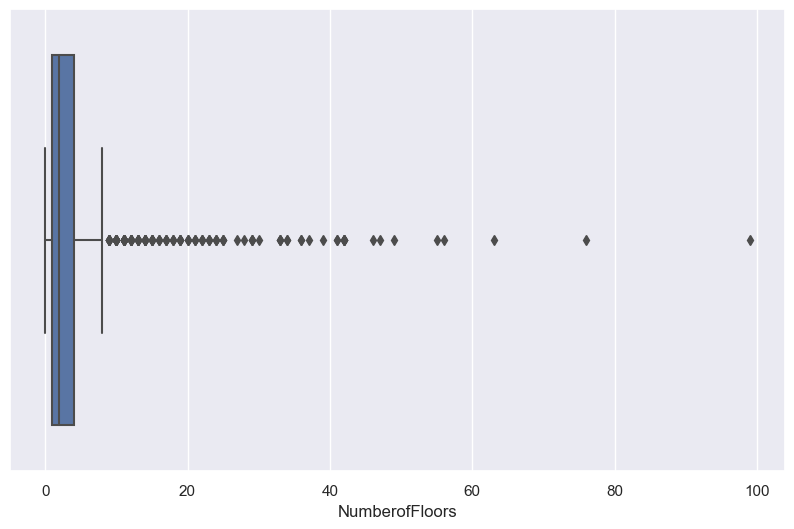

Analyse sur l'indicateur PropertyGFATotal


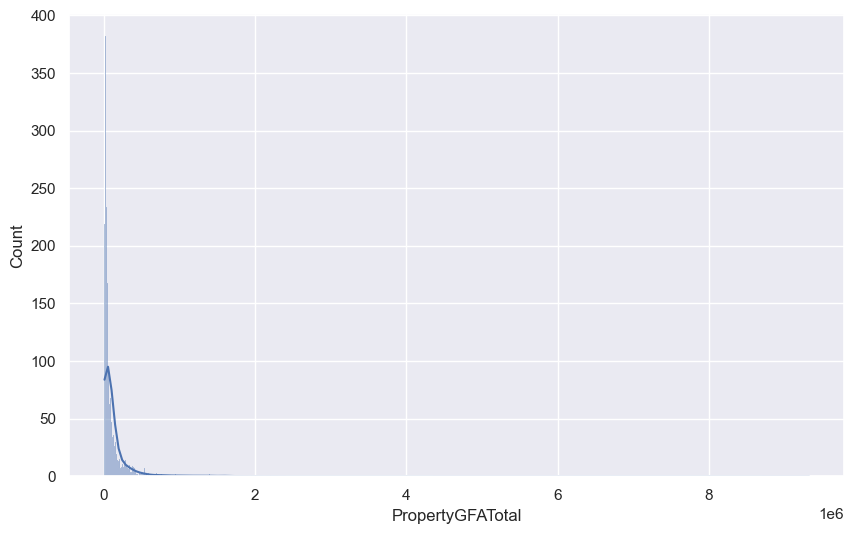

La moyenne est 118842.7242206235
L'écart type est 297362.21227418823
La médiane est 49289.5
Le Skewness empirique est 19.15546529255971
La distribution de l'indicateur "PropertyGFATotal" est étalée à droite
Le kurtosis est 555.2794701426601
La distribution de l'indicateur "PropertyGFATotal" est moins aplatie que la distribution normale : les observations sont plus concentrées


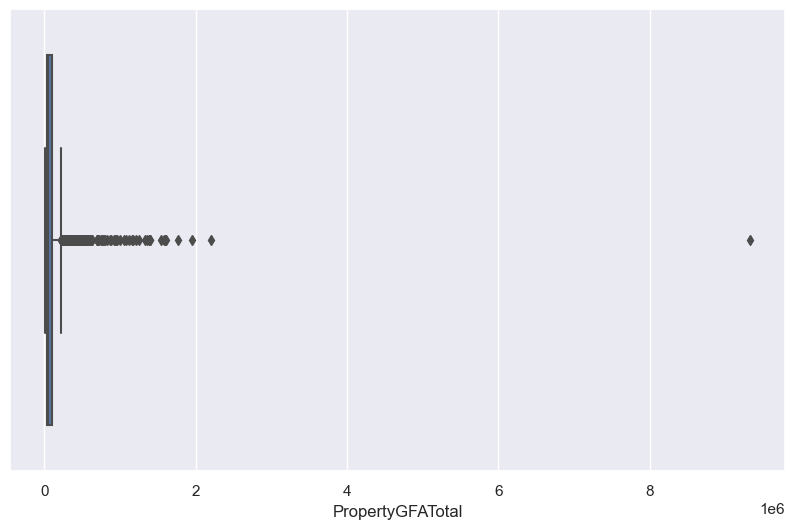

Analyse sur l'indicateur PropertyGFAParking


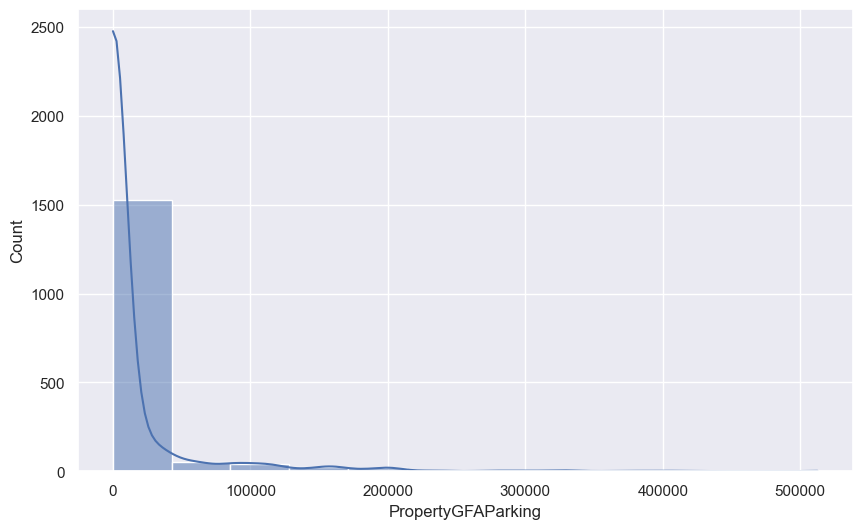

La moyenne est 12897.97901678657
L'écart type est 42274.51118540894
La médiane est 0.0
Le Skewness empirique est 5.223274878878329
La distribution de l'indicateur "PropertyGFAParking" est étalée à droite
Le kurtosis est 35.50050086374103
La distribution de l'indicateur "PropertyGFAParking" est moins aplatie que la distribution normale : les observations sont plus concentrées


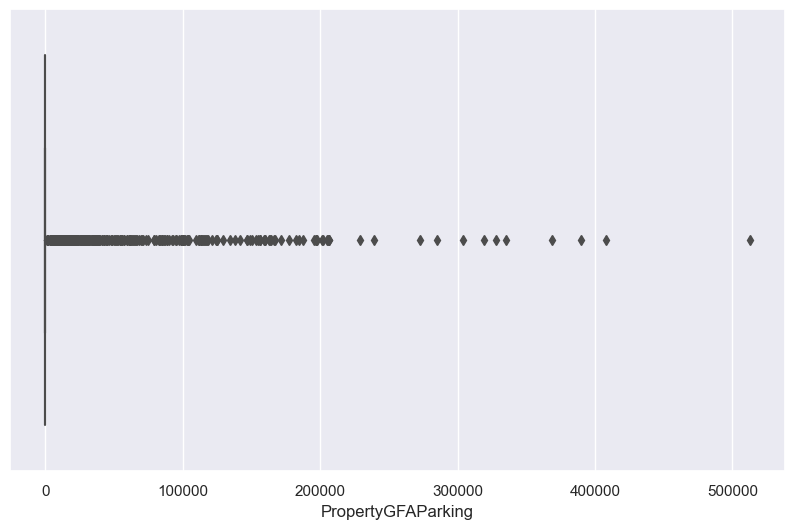

Analyse sur l'indicateur PropertyGFABuilding(s)


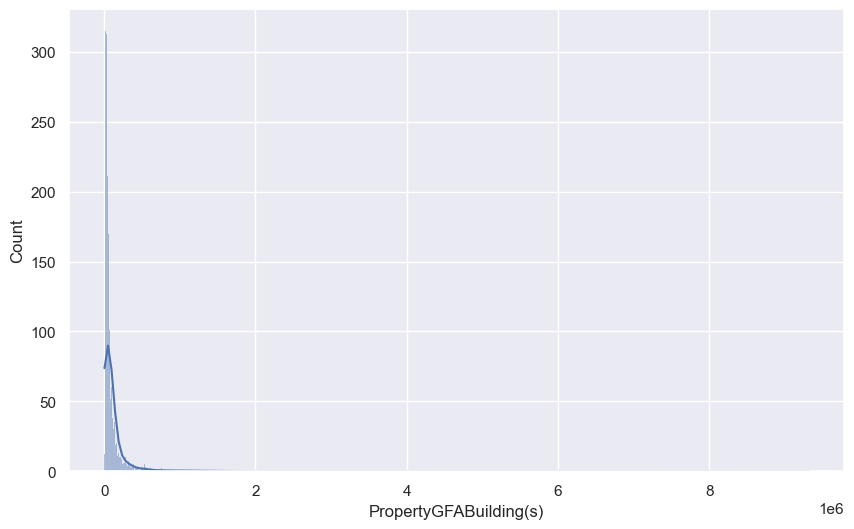

La moyenne est 105944.74520383694
L'écart type est 284211.57410373405
La médiane est 47391.5
Le Skewness empirique est 21.652781356820014
La distribution de l'indicateur "PropertyGFABuilding(s)" est étalée à droite
Le kurtosis est 667.7156633928373
La distribution de l'indicateur "PropertyGFABuilding(s)" est moins aplatie que la distribution normale : les observations sont plus concentrées


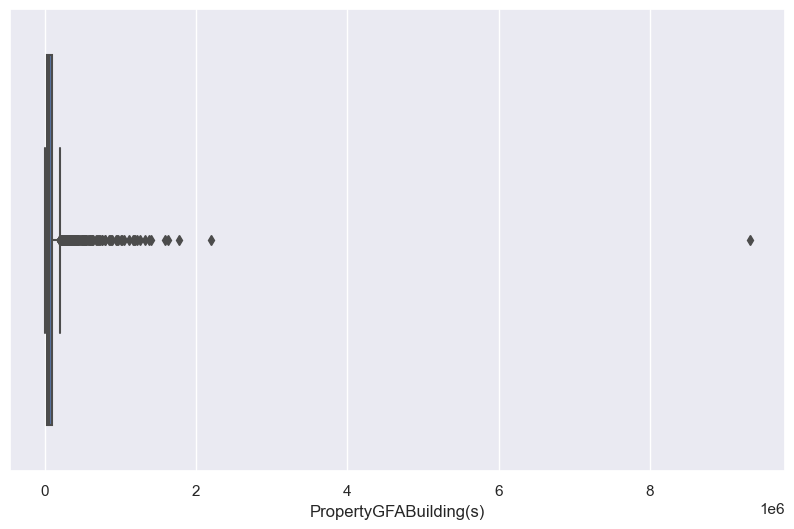

Analyse sur l'indicateur LargestPropertyUseTypeGFA


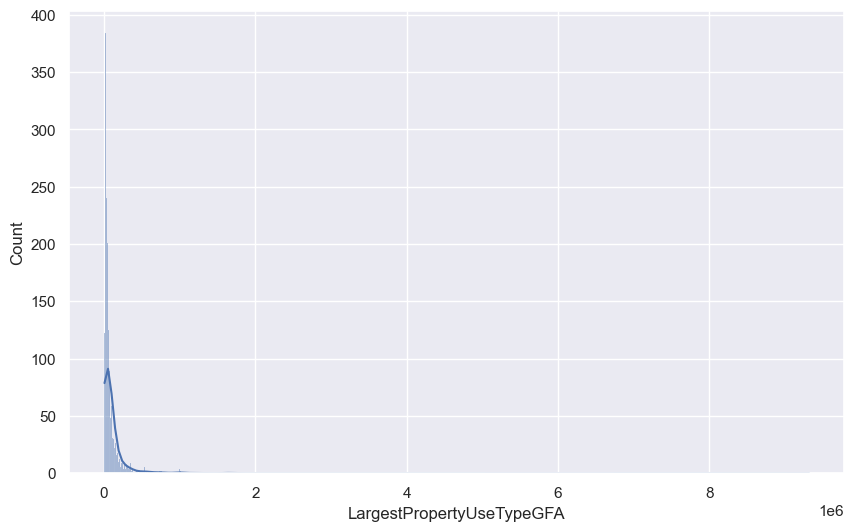

La moyenne est 98764.68592057761
L'écart type est 276711.06336955325
La médiane est 43770.5
Le Skewness empirique est 23.28017026336374
La distribution de l'indicateur "LargestPropertyUseTypeGFA" est étalée à droite
Le kurtosis est 746.3765526786228
La distribution de l'indicateur "LargestPropertyUseTypeGFA" est moins aplatie que la distribution normale : les observations sont plus concentrées


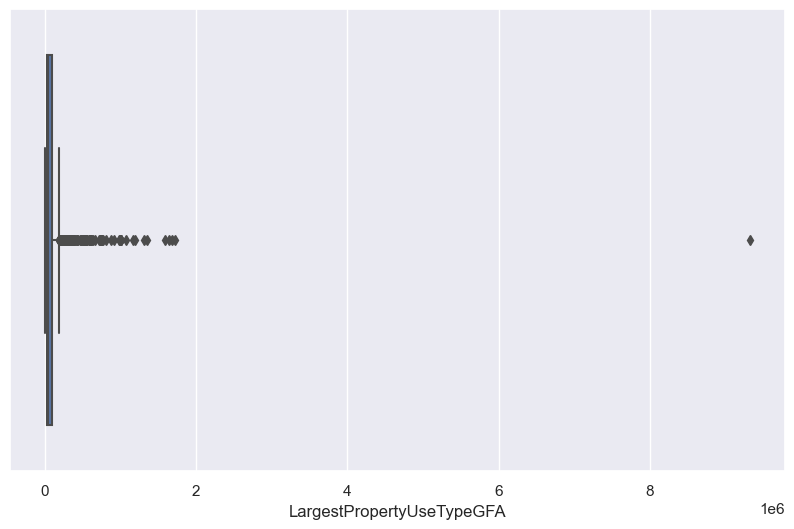

Analyse sur l'indicateur SecondLargestPropertyUseTypeGFA


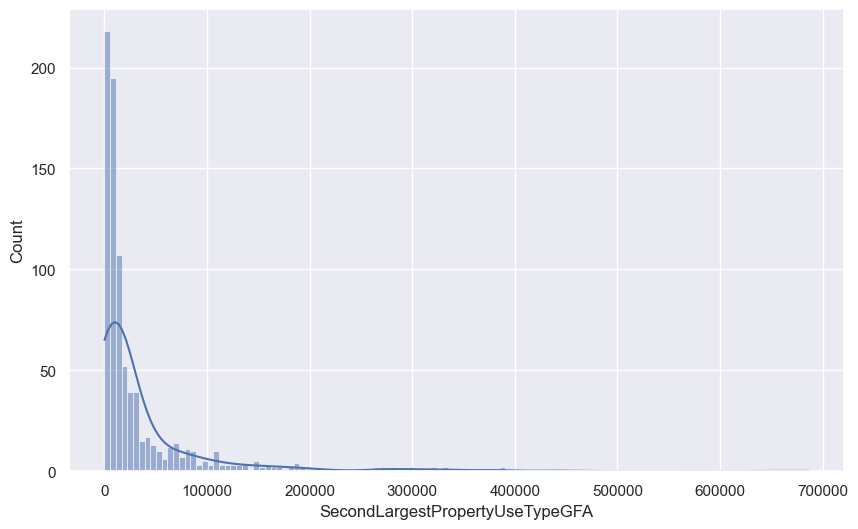

La moyenne est 36804.1605811462
L'écart type est 69845.26102389579
La médiane est 12000.0
Le Skewness empirique est 4.145651924775239
La distribution de l'indicateur "SecondLargestPropertyUseTypeGFA" est étalée à droite
Le kurtosis est 22.96601758272664
La distribution de l'indicateur "SecondLargestPropertyUseTypeGFA" est moins aplatie que la distribution normale : les observations sont plus concentrées


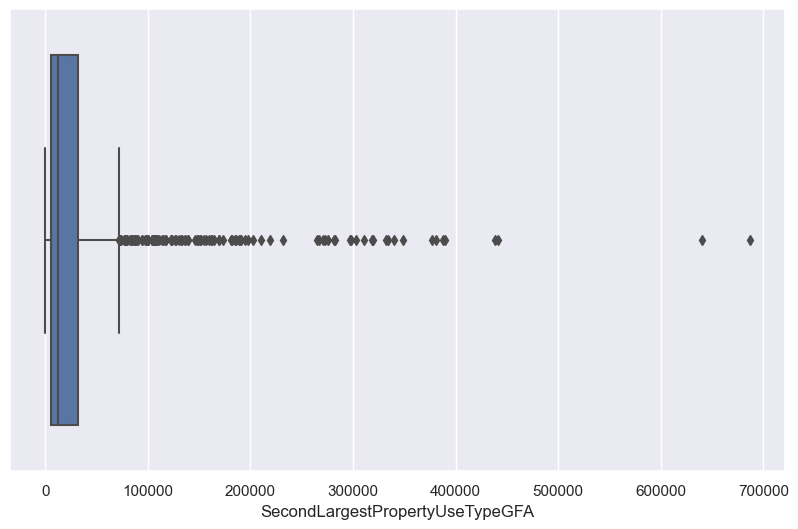

Analyse sur l'indicateur ThirdLargestPropertyUseTypeGFA


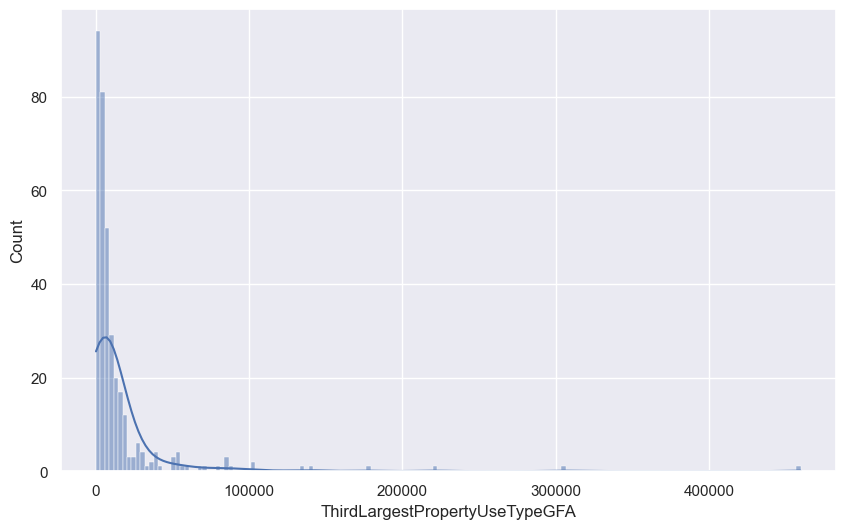

La moyenne est 14923.139939614732
L'écart type est 36790.55655964371
La médiane est 5931.0
Le Skewness empirique est 7.597161308618136
La distribution de l'indicateur "ThirdLargestPropertyUseTypeGFA" est étalée à droite
Le kurtosis est 74.79400348251576
La distribution de l'indicateur "ThirdLargestPropertyUseTypeGFA" est moins aplatie que la distribution normale : les observations sont plus concentrées


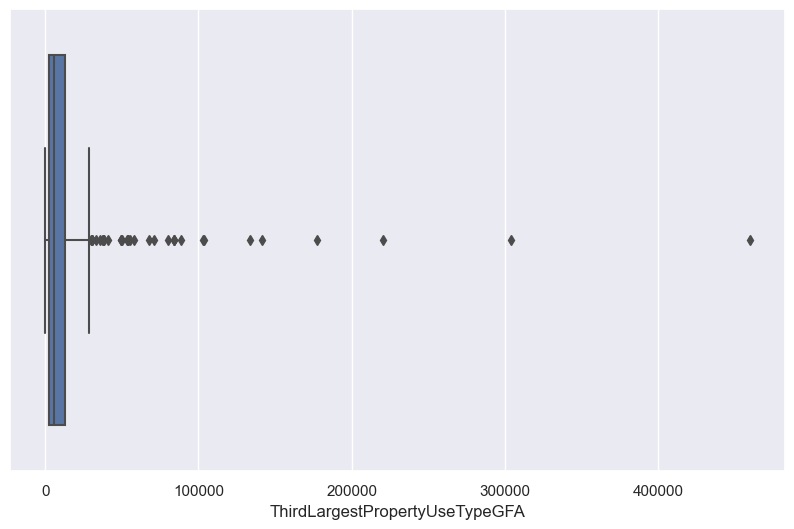

Analyse sur l'indicateur ENERGYSTARScore


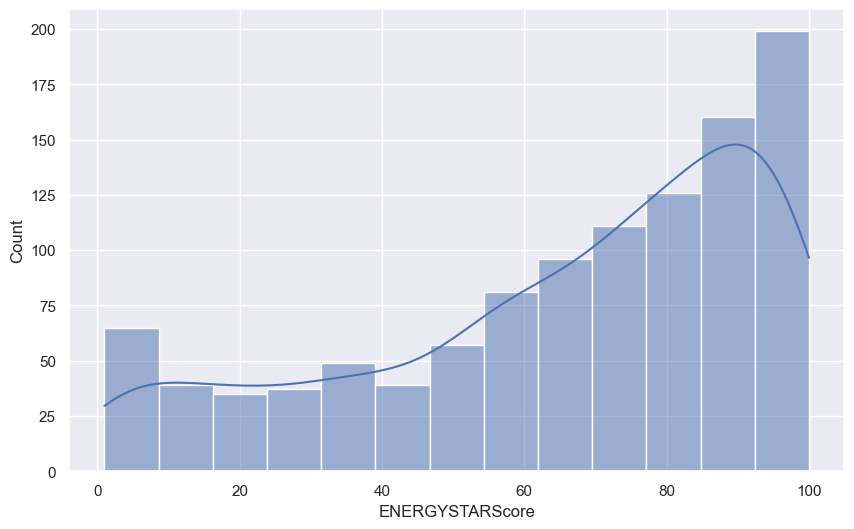

La moyenne est 65.44972577696527
L'écart type est 28.492928368068167
La médiane est 73.0
Le Skewness empirique est -0.7753439370316582
La distribution de l'indicateur "ENERGYSTARScore" est étalée à gauche
Le kurtosis est -0.5063357544257361
La distribution de l'indicateur "ENERGYSTARScore" est plus aplatie


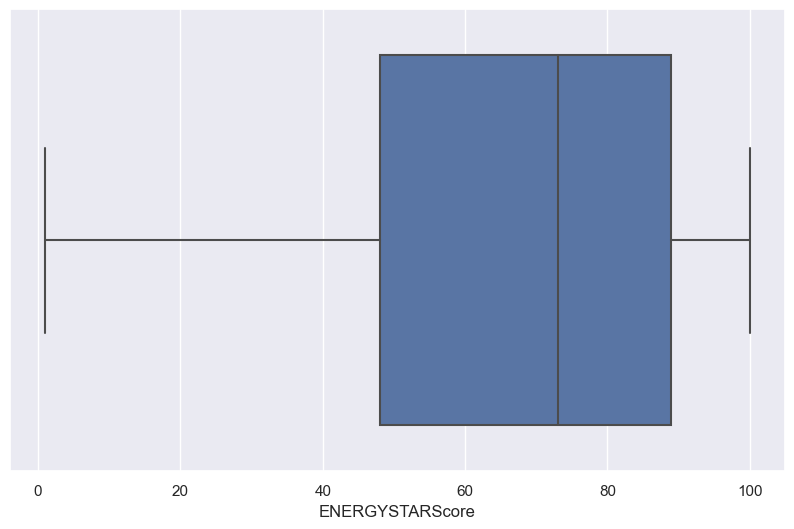

Analyse sur l'indicateur SiteEUI(kBtu/sf)


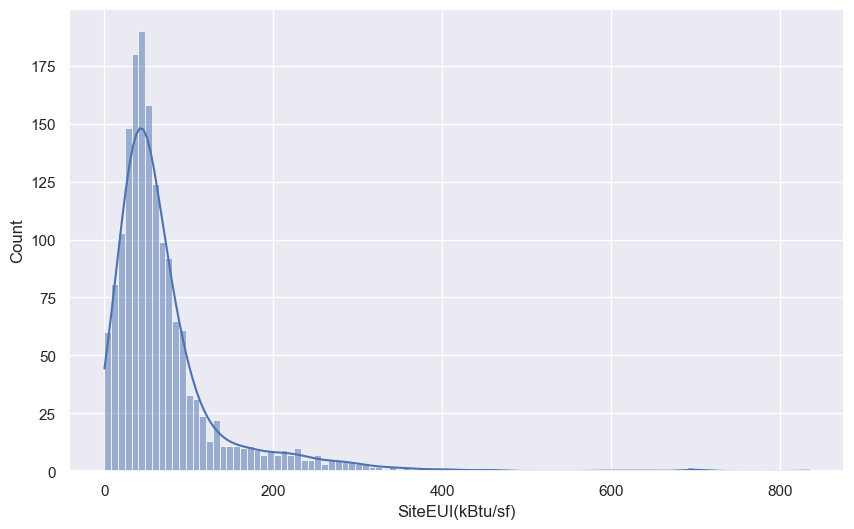

La moyenne est 72.15879886352613
L'écart type est 74.04812853241198
La médiane est 51.90000153
Le Skewness empirique est 3.726494535823528
La distribution de l'indicateur "SiteEUI(kBtu/sf)" est étalée à droite
Le kurtosis est 22.18288224013475
La distribution de l'indicateur "SiteEUI(kBtu/sf)" est moins aplatie que la distribution normale : les observations sont plus concentrées


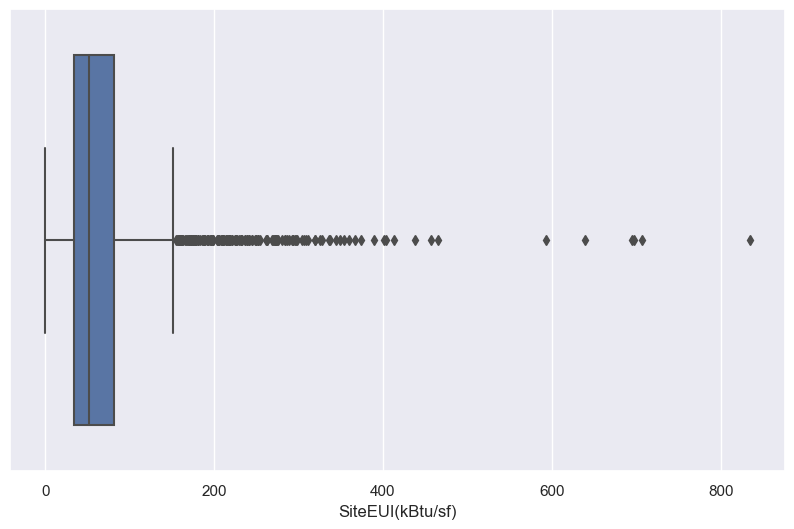

Analyse sur l'indicateur SiteEUIWN(kBtu/sf)


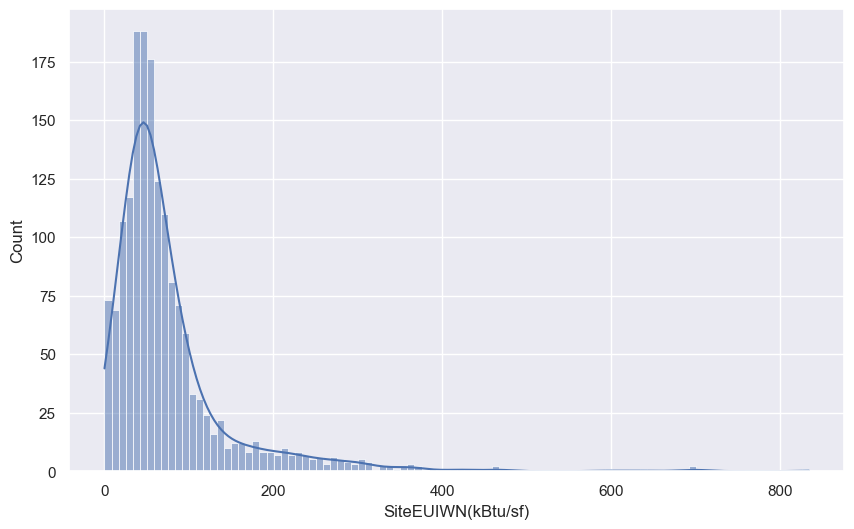

La moyenne est 74.56852856205165
L'écart type est 75.0284026563713
La médiane est 53.90000153
Le Skewness empirique est 3.628417675202233
La distribution de l'indicateur "SiteEUIWN(kBtu/sf)" est étalée à droite
Le kurtosis est 20.994551463081276
La distribution de l'indicateur "SiteEUIWN(kBtu/sf)" est moins aplatie que la distribution normale : les observations sont plus concentrées


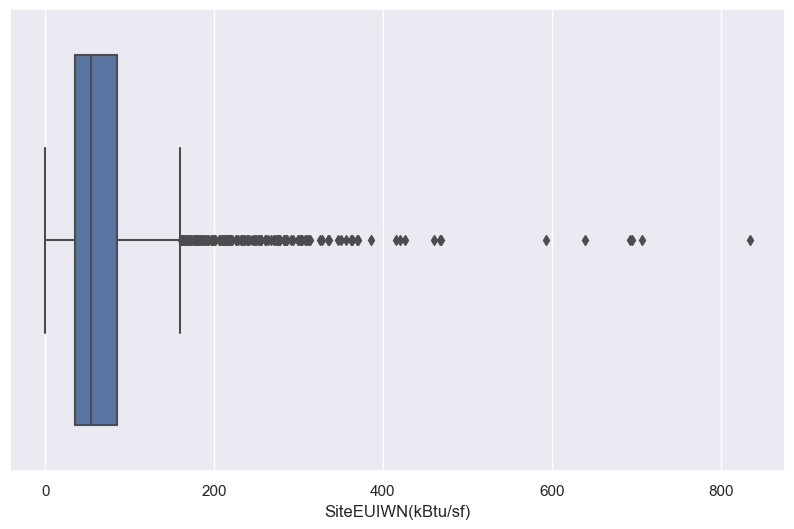

Analyse sur l'indicateur SourceEUI(kBtu/sf)


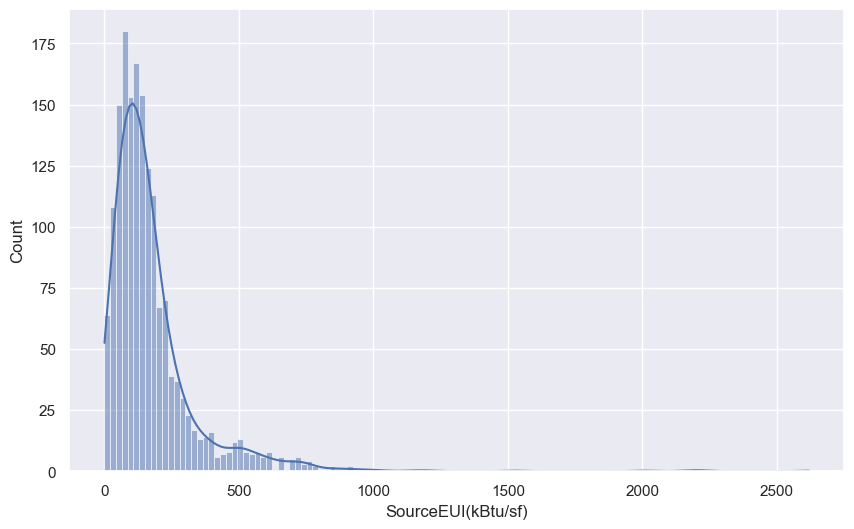

La moyenne est 175.82989198558644
L'écart type est 185.93212093347196
La médiane est 130.94999695
Le Skewness empirique est 4.930490157490406
La distribution de l'indicateur "SourceEUI(kBtu/sf)" est étalée à droite
Le kurtosis est 43.663442652043955
La distribution de l'indicateur "SourceEUI(kBtu/sf)" est moins aplatie que la distribution normale : les observations sont plus concentrées


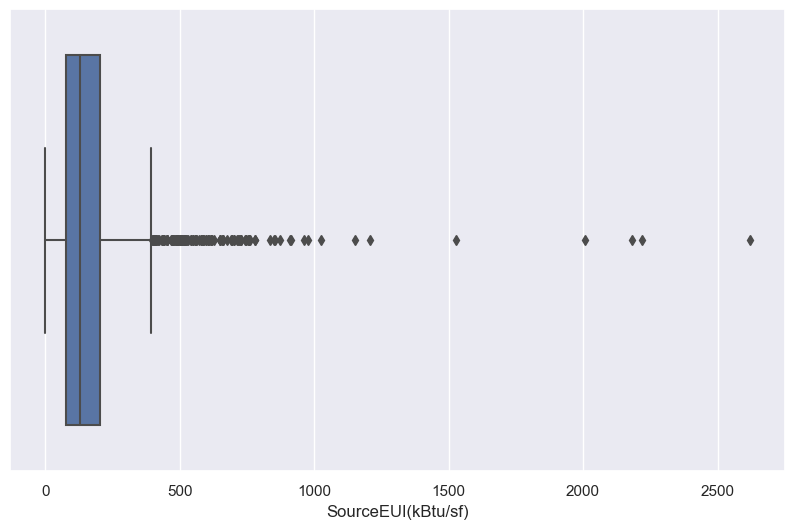

Analyse sur l'indicateur SourceEUIWN(kBtu/sf)


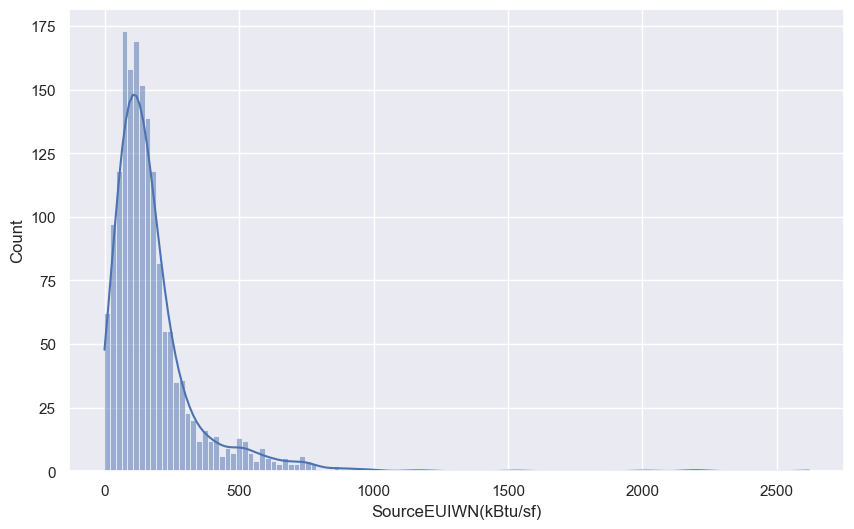

La moyenne est 178.0908763802791
L'écart type est 185.91874928530567
La médiane est 134.1500015
Le Skewness empirique est 4.907348942623215
La distribution de l'indicateur "SourceEUIWN(kBtu/sf)" est étalée à droite
Le kurtosis est 43.43832373390472
La distribution de l'indicateur "SourceEUIWN(kBtu/sf)" est moins aplatie que la distribution normale : les observations sont plus concentrées


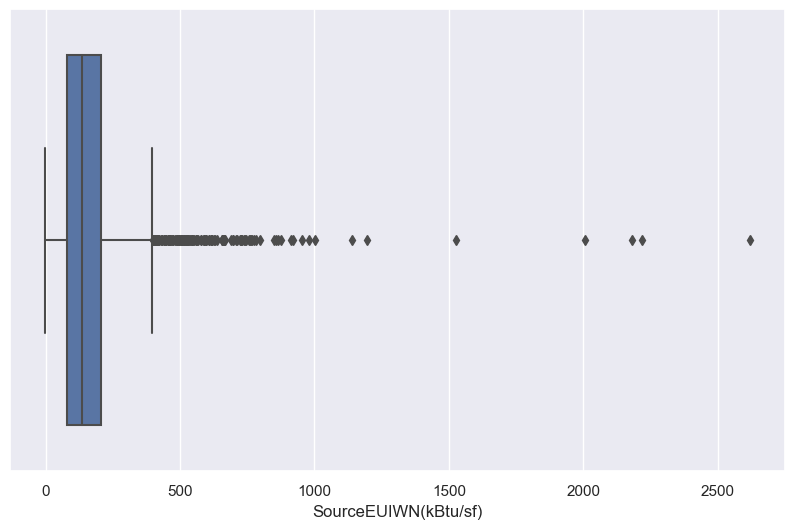

Analyse sur l'indicateur SiteEnergyUse(kBtu)


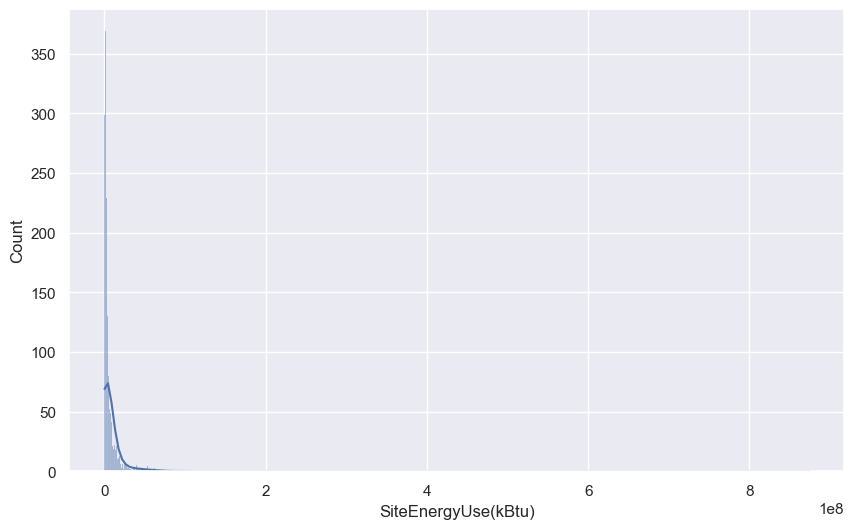

La moyenne est 8437933.216594957
L'écart type est 30243803.391353417
La médiane est 2554947.25
Le Skewness empirique est 18.047888414726085
La distribution de l'indicateur "SiteEnergyUse(kBtu)" est étalée à droite
Le kurtosis est 445.1210835770923
La distribution de l'indicateur "SiteEnergyUse(kBtu)" est moins aplatie que la distribution normale : les observations sont plus concentrées


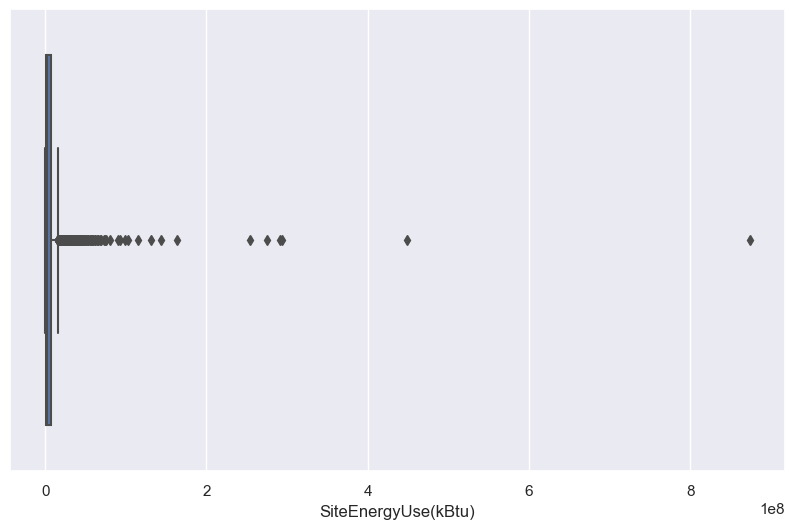

Analyse sur l'indicateur SiteEnergyUseWN(kBtu)


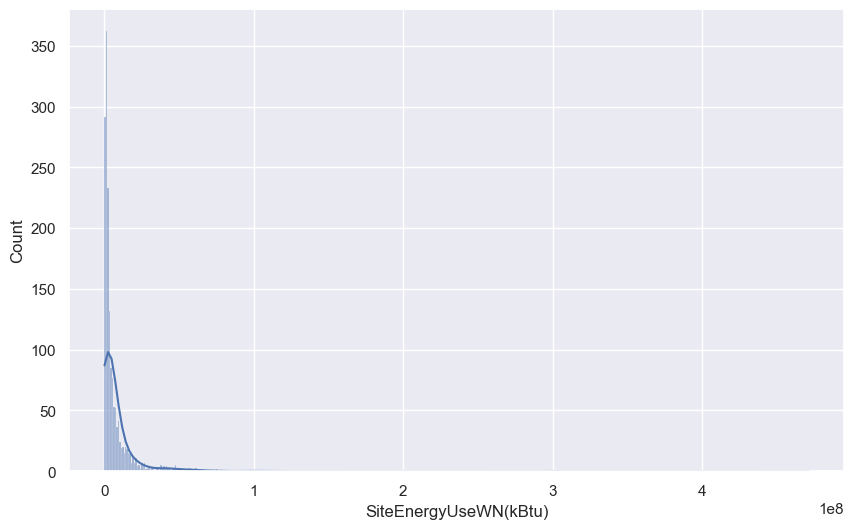

La moyenne est 8064790.43755734
L'écart type est 22038776.26327751
La médiane est 2685146.5
Le Skewness empirique est 11.302912565186912
La distribution de l'indicateur "SiteEnergyUseWN(kBtu)" est étalée à droite
Le kurtosis est 178.40472791817837
La distribution de l'indicateur "SiteEnergyUseWN(kBtu)" est moins aplatie que la distribution normale : les observations sont plus concentrées


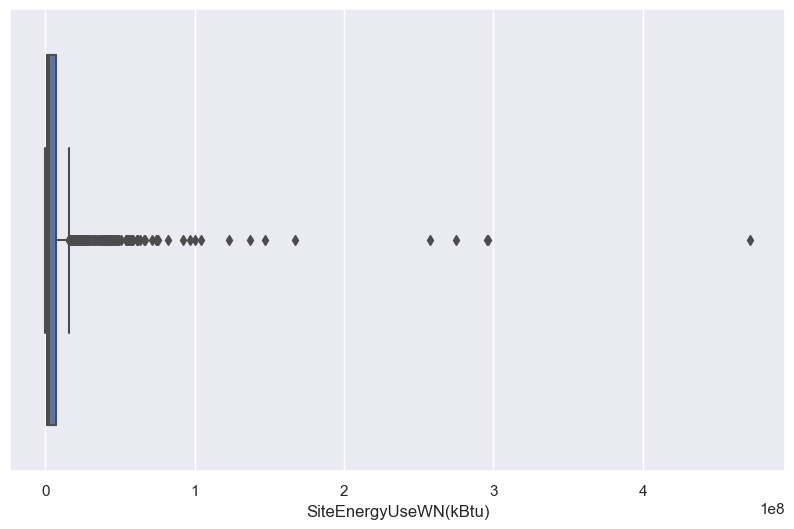

Analyse sur l'indicateur SteamUse(kBtu)


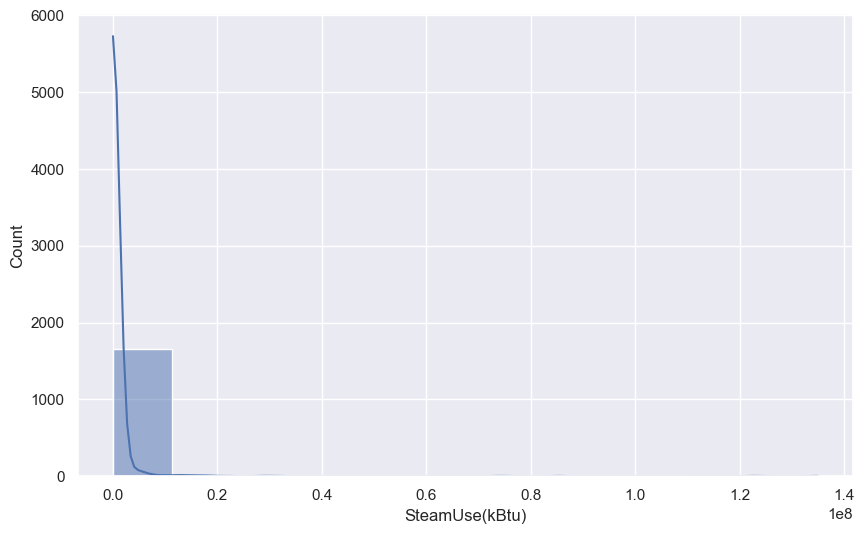

La moyenne est 512572.5649878632
L'écart type est 5513943.682302378
La médiane est 0.0
Le Skewness empirique est 19.140155491344686
La distribution de l'indicateur "SteamUse(kBtu)" est étalée à droite
Le kurtosis est 408.1838328566989
La distribution de l'indicateur "SteamUse(kBtu)" est moins aplatie que la distribution normale : les observations sont plus concentrées


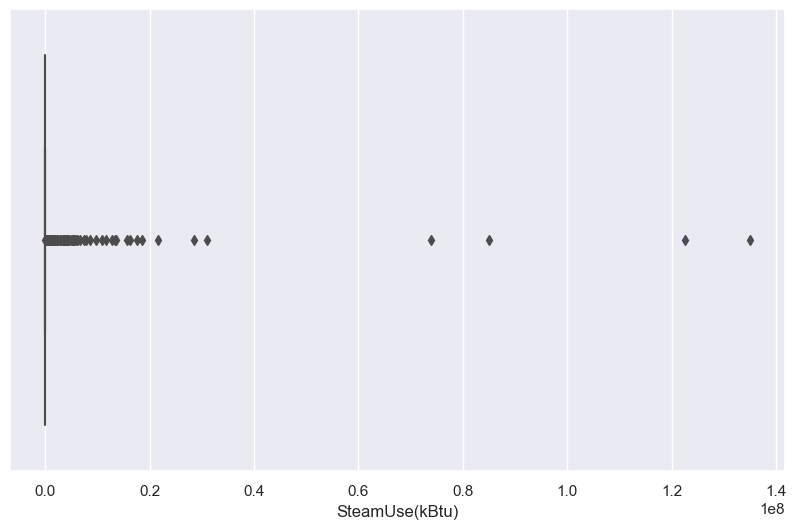

Analyse sur l'indicateur Electricity(kWh)


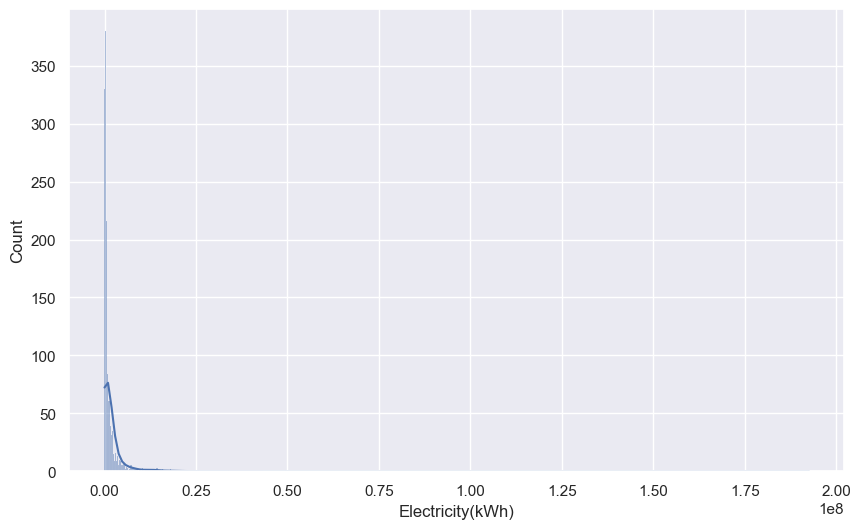

La moyenne est 1712629.7824971718
L'écart type est 6095171.5234508375
La médiane est 472415.34375
Le Skewness empirique est 20.84996868471276
La distribution de l'indicateur "Electricity(kWh)" est étalée à droite
Le kurtosis est 599.4795661016586
La distribution de l'indicateur "Electricity(kWh)" est moins aplatie que la distribution normale : les observations sont plus concentrées


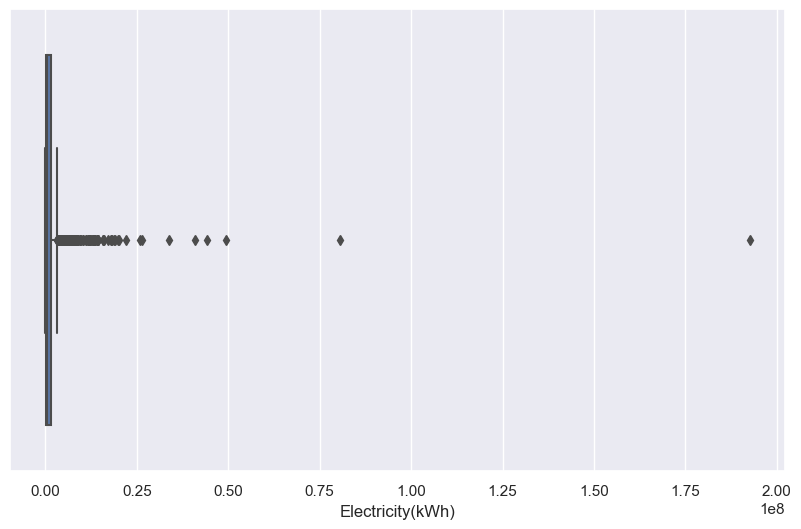

Analyse sur l'indicateur Electricity(kBtu)


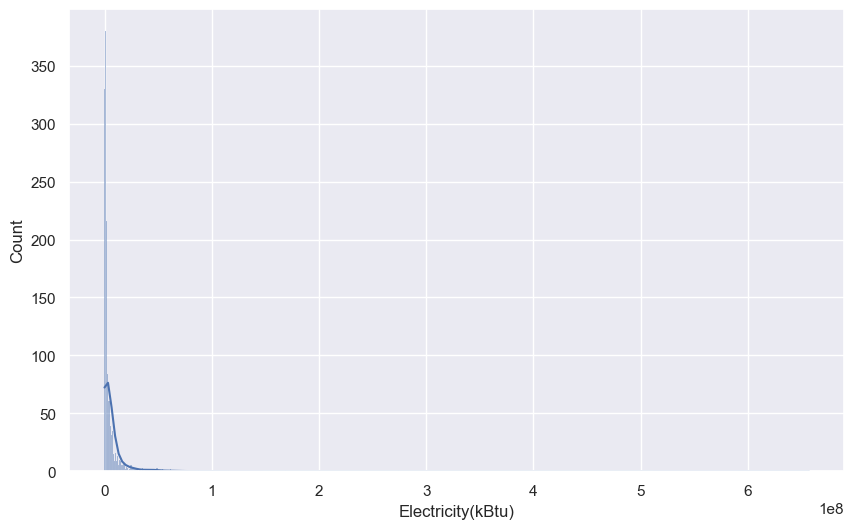

La moyenne est 5843492.819380552
L'écart type est 20796725.22707869
La médiane est 1611881.0
Le Skewness empirique est 20.849968702953618
La distribution de l'indicateur "Electricity(kBtu)" est étalée à droite
Le kurtosis est 599.4795670447397
La distribution de l'indicateur "Electricity(kBtu)" est moins aplatie que la distribution normale : les observations sont plus concentrées


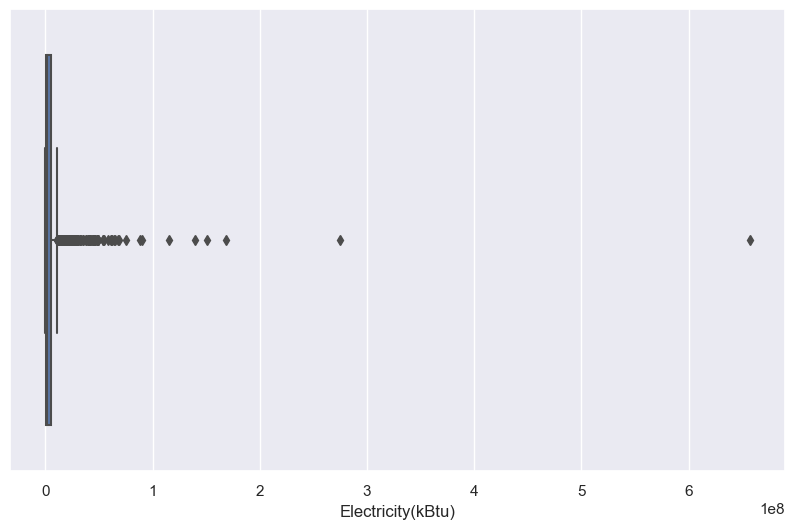

Analyse sur l'indicateur NaturalGas(therms)


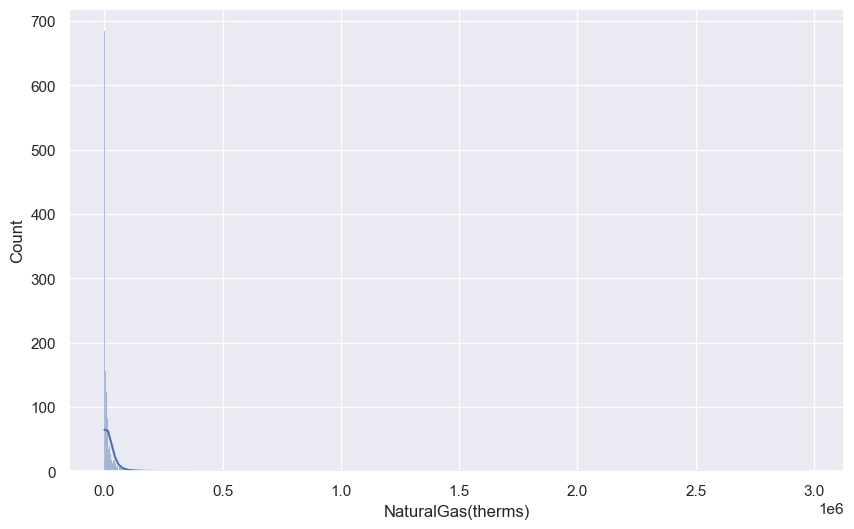

La moyenne est 19708.446371331564
L'écart type est 93708.1364929365
La médiane est 4982.630127
Le Skewness empirique est 22.09839812509524
La distribution de l'indicateur "NaturalGas(therms)" est étalée à droite
Le kurtosis est 632.248580695071
La distribution de l'indicateur "NaturalGas(therms)" est moins aplatie que la distribution normale : les observations sont plus concentrées


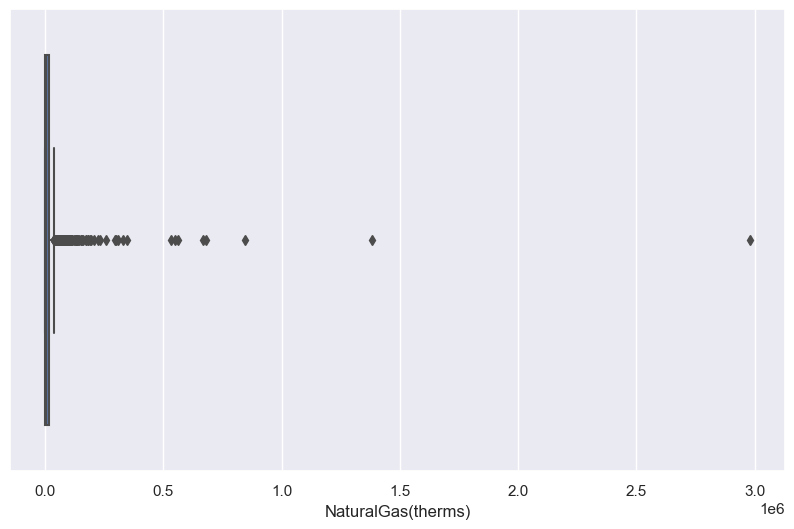

Analyse sur l'indicateur NaturalGas(kBtu)


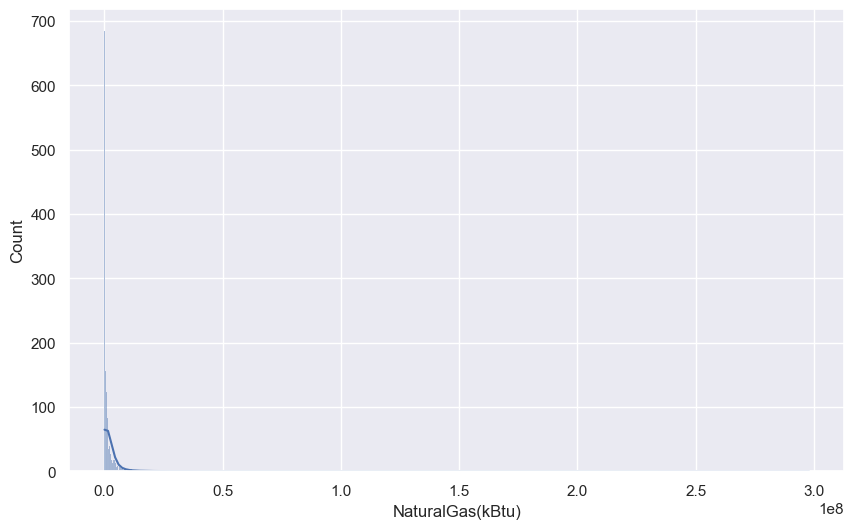

La moyenne est 1970844.6416793517
L'écart type est 9370813.655222671
La médiane est 498263.0
Le Skewness empirique est 22.098398107962346
La distribution de l'indicateur "NaturalGas(kBtu)" est étalée à droite
Le kurtosis est 632.2485795158857
La distribution de l'indicateur "NaturalGas(kBtu)" est moins aplatie que la distribution normale : les observations sont plus concentrées


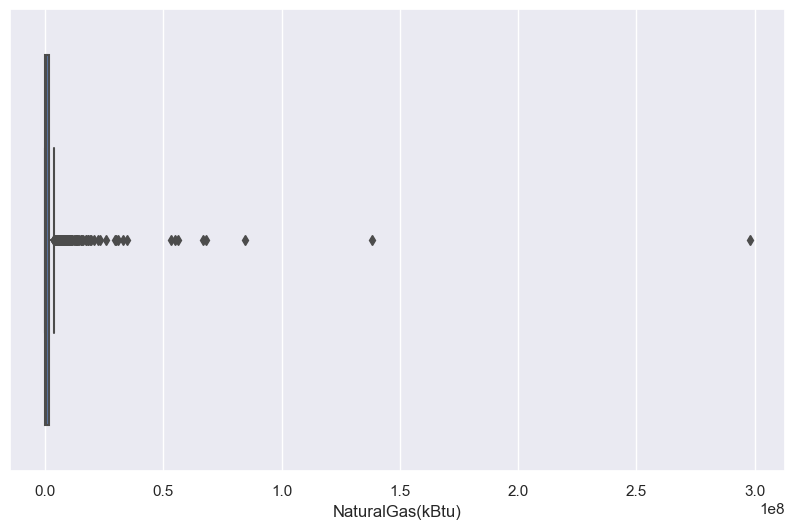

Analyse sur l'indicateur TotalGHGEmissions


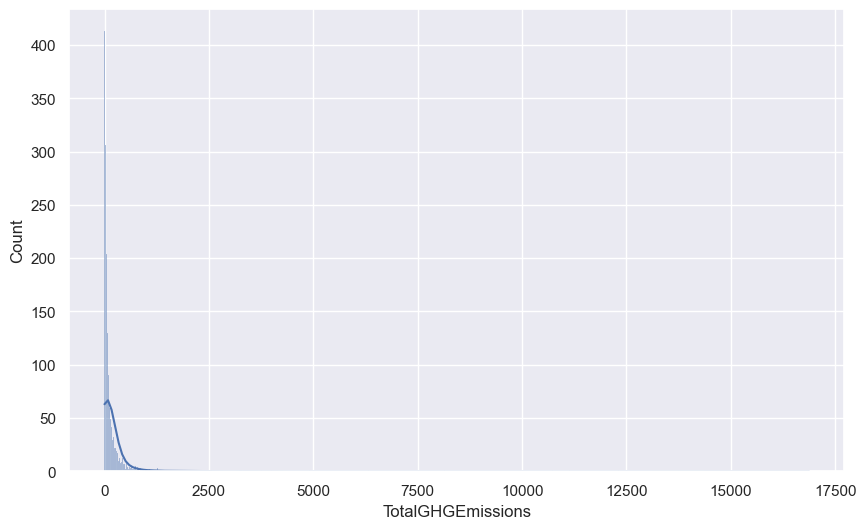

La moyenne est 184.97330132052824
L'écart type est 751.9760008327221
La médiane est 49.58
Le Skewness empirique est 14.213855726942699
La distribution de l'indicateur "TotalGHGEmissions" est étalée à droite
Le kurtosis est 247.10206648218906
La distribution de l'indicateur "TotalGHGEmissions" est moins aplatie que la distribution normale : les observations sont plus concentrées


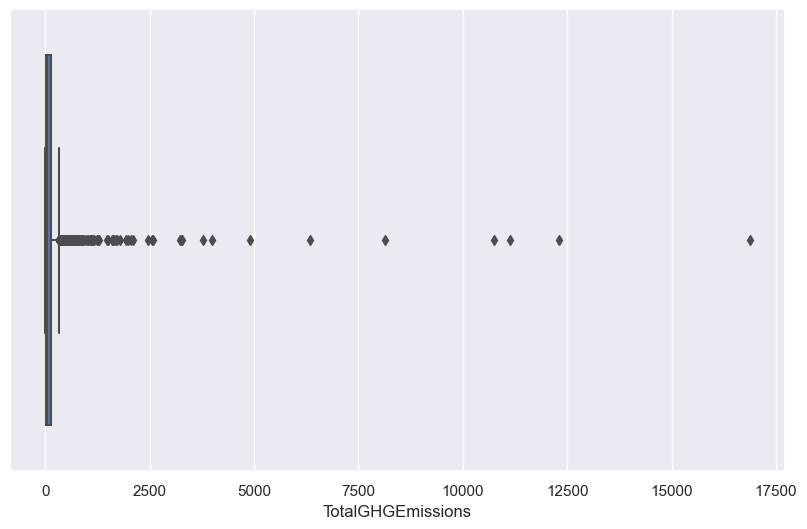

Analyse sur l'indicateur GHGEmissionsIntensity


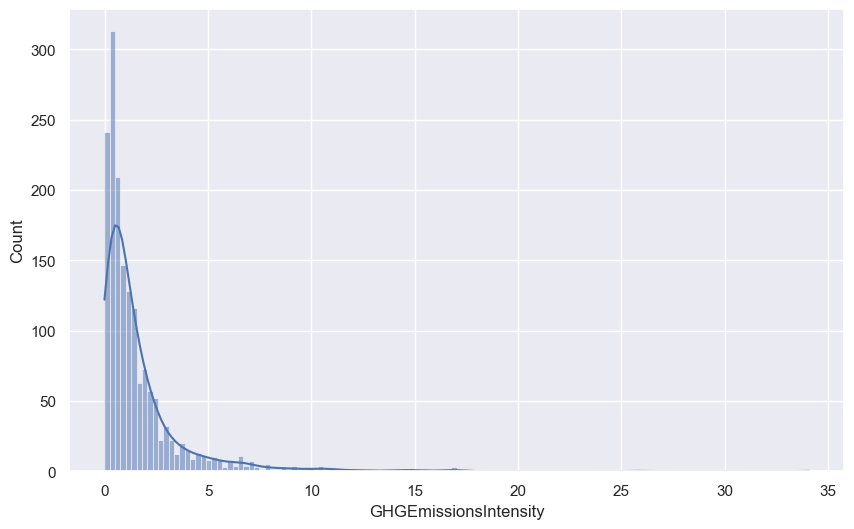

La moyenne est 1.6078451380552221
L'écart type est 2.336882341390962
La médiane est 0.88
Le Skewness empirique est 4.705311664930059
La distribution de l'indicateur "GHGEmissionsIntensity" est étalée à droite
Le kurtosis est 38.065954180701326
La distribution de l'indicateur "GHGEmissionsIntensity" est moins aplatie que la distribution normale : les observations sont plus concentrées


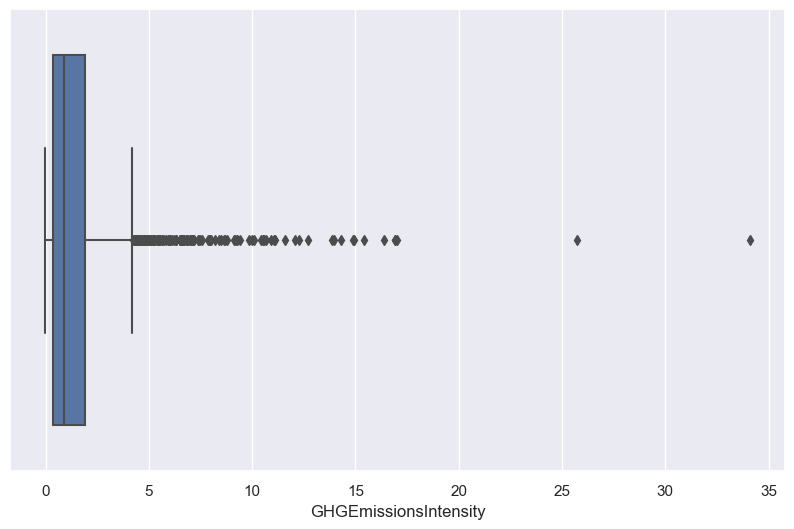

In [28]:
# Affichage des distributions sur les colonnes de type numérique
for indicator in numerical_columns:
    show_indicators(building_consumption, indicator)

### Concentrer sur les valeurs à prédire

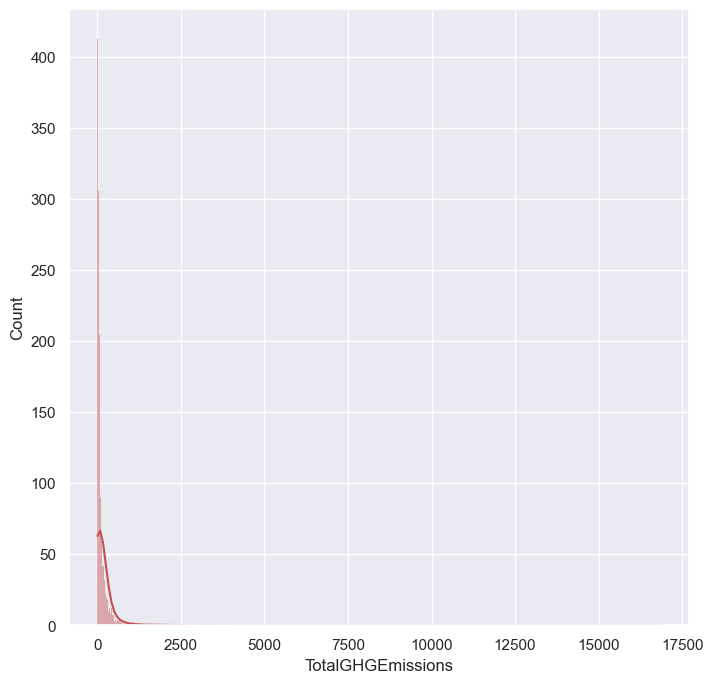

In [29]:
# df_emission_limit = building_consumption.loc[building_consumption["TotalGHGEmissions"] < building_consumption["TotalGHGEmissions"].quantile(0.97)]

plt.figure(figsize=(8,8))
sns.set_theme()
sns.histplot(building_consumption["TotalGHGEmissions"], kde=True, color="r")
plt.show()

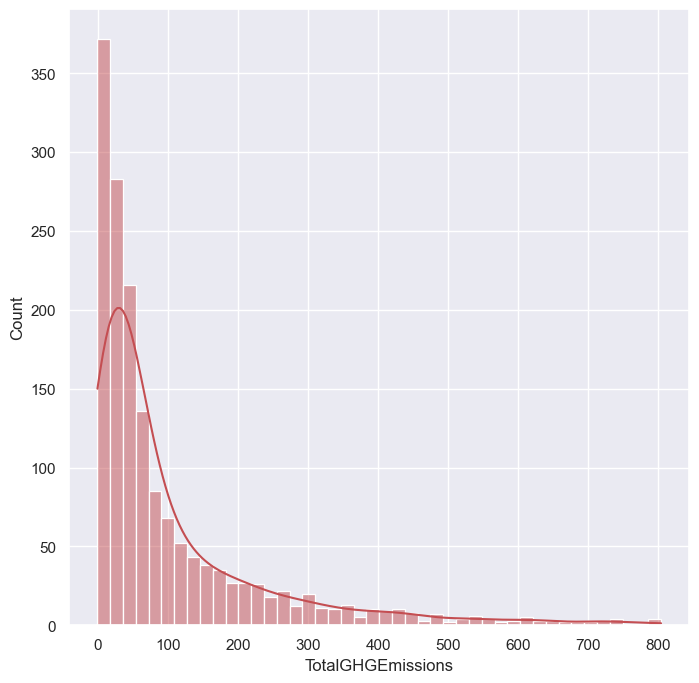

In [30]:
df_emission_limit = building_consumption.loc[building_consumption["TotalGHGEmissions"] < building_consumption["TotalGHGEmissions"].quantile(0.97)]

plt.figure(figsize=(8,8))
sns.set_theme()
sns.histplot(df_emission_limit["TotalGHGEmissions"], kde=True, color="r")
plt.show()

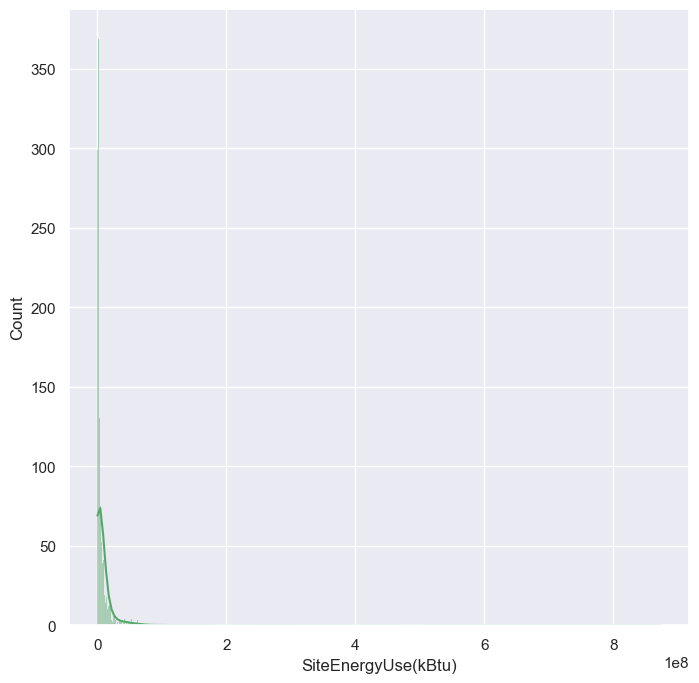

In [31]:
df_energy_limit = building_consumption.loc[building_consumption["SiteEnergyUse(kBtu)"] < building_consumption["SiteEnergyUse(kBtu)"].quantile(0.97)]

plt.figure(figsize=(8,8))
sns.set_theme()
sns.histplot(building_consumption["SiteEnergyUse(kBtu)"], kde=True, color="g")
plt.show()

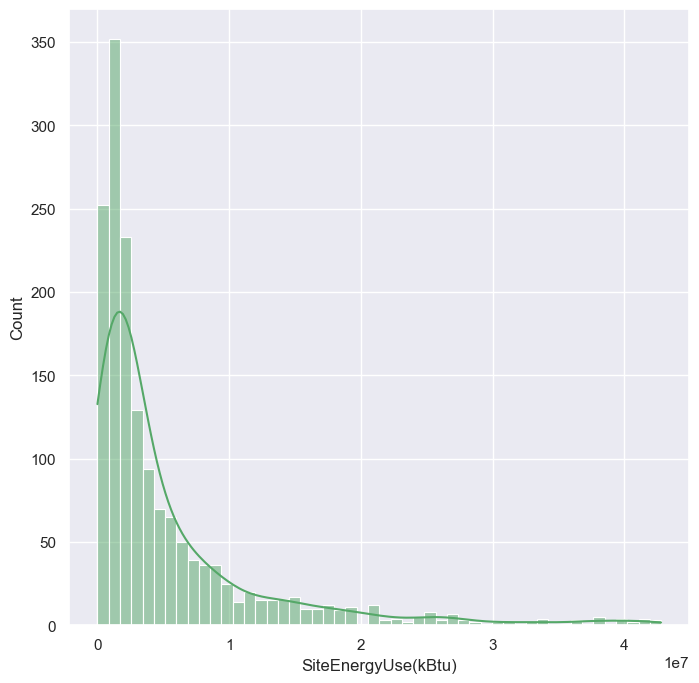

In [32]:
df_energy_limit = building_consumption.loc[building_consumption["SiteEnergyUse(kBtu)"] < building_consumption["SiteEnergyUse(kBtu)"].quantile(0.97)]

plt.figure(figsize=(8,8))
sns.set_theme()
sns.histplot(df_energy_limit["SiteEnergyUse(kBtu)"], kde=True, color="g")
plt.show()

In [33]:
# Création de colonne âge de batiment
building_consumption["BuildingAge"] = building_consumption["DataYear"] - building_consumption["YearBuilt"].astype(int)

<Axes: xlabel='BuildingAge', ylabel='Count'>

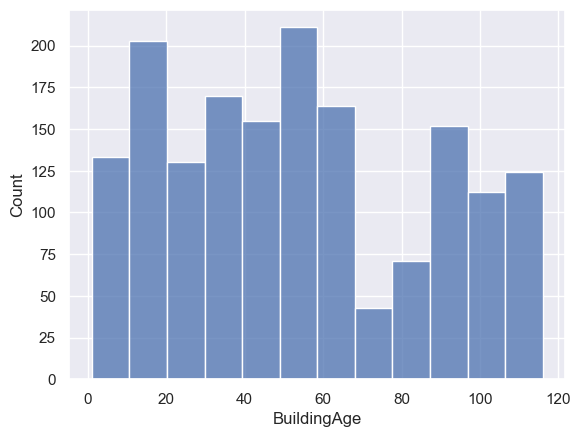

In [34]:
# Distribution de l'âge de bâtiment
sns.histplot(building_consumption["BuildingAge"])

In [35]:
# Distribution d'utilisation d'énergie par code postale
grouped_data = building_consumption.groupby('ZipCode')['SiteEnergyUse(kBtu)'].mean().reset_index()
# Fusionner avec les coordonnées
heatmap_data = building_consumption[['ZipCode', 'Latitude', 'Longitude']].drop_duplicates().merge(grouped_data)

# Créer la carte
m = folium.Map(location=[47.6062, -122.3321], zoom_start=11)
heat_data = heatmap_data[['Latitude', 'Longitude', 'SiteEnergyUse(kBtu)']].values.tolist()
HeatMap(heat_data).add_to(m)
m

In [36]:
columns = ['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'BuildingType',
 'PrimaryPropertyType',
 'ZipCode',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'YearsENERGYSTARCertified',
 'ComplianceStatus']

/var/folders/b8/_p_1v95j6ql648xwdw382p9h0000gn/T/ipykernel_73806/1441565936.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(building_consumption[columns].corr(), vmin=-1, vmax=1, annot=True)


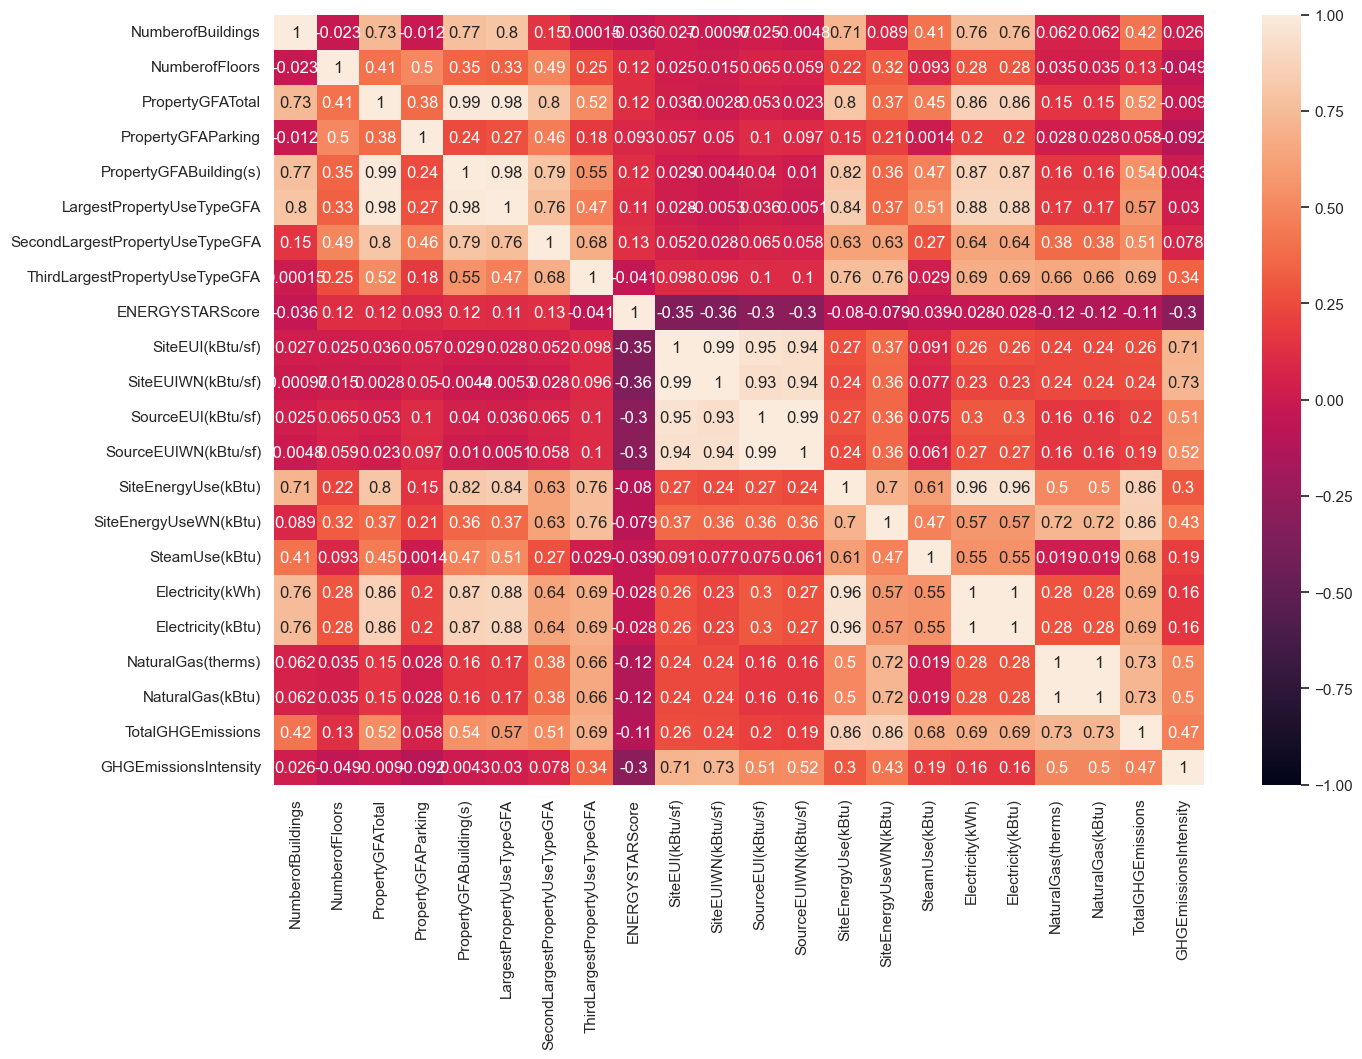

In [37]:
# Affichage de matrice de corrélation
plt.figure(figsize=(15,10))
sns.heatmap(building_consumption[columns].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

### Distribution de la colonne SiteEnergyUse(kBtu) avec les attributs catégoriels

In [38]:
def show_num_cat_distribution(df, num_col, cat_col):
    print(f"Analyse sur colonne numérique {num_col} et catégorielle {cat_col}")
    plt.figure(figsize=(10,6))
    sns.set_theme()
    
    # Création du countplot de base
    plt.figure(figsize=(15,12))
    ax = sns.boxplot(x=num_col, y=cat_col, data=df)
    ax.tick_params(axis='x', rotation=90)
    plt.show()

In [39]:
cat_cols = building_consumption.select_dtypes(["object"]).drop(columns=["Address", 
                                                                        "PropertyName", 
                                                                        "State", 
                                                                        "City", 
                                                                        "TaxParcelIdentificationNumber",
                                                                        "ListOfAllPropertyUseTypes"])


Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle BuildingType


<Figure size 1000x600 with 0 Axes>

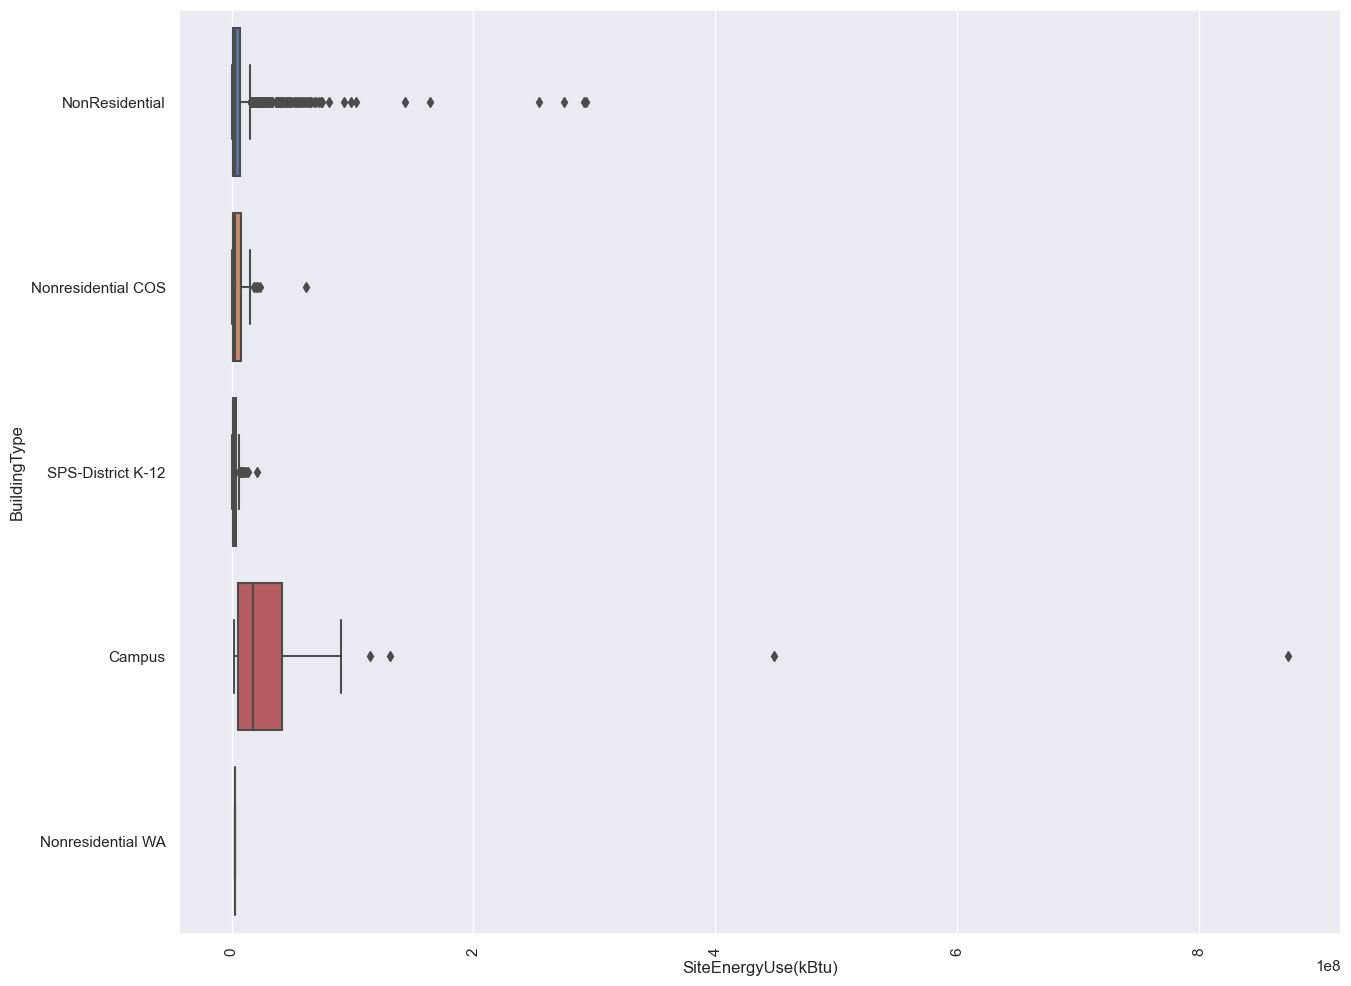

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle PrimaryPropertyType


<Figure size 1000x600 with 0 Axes>

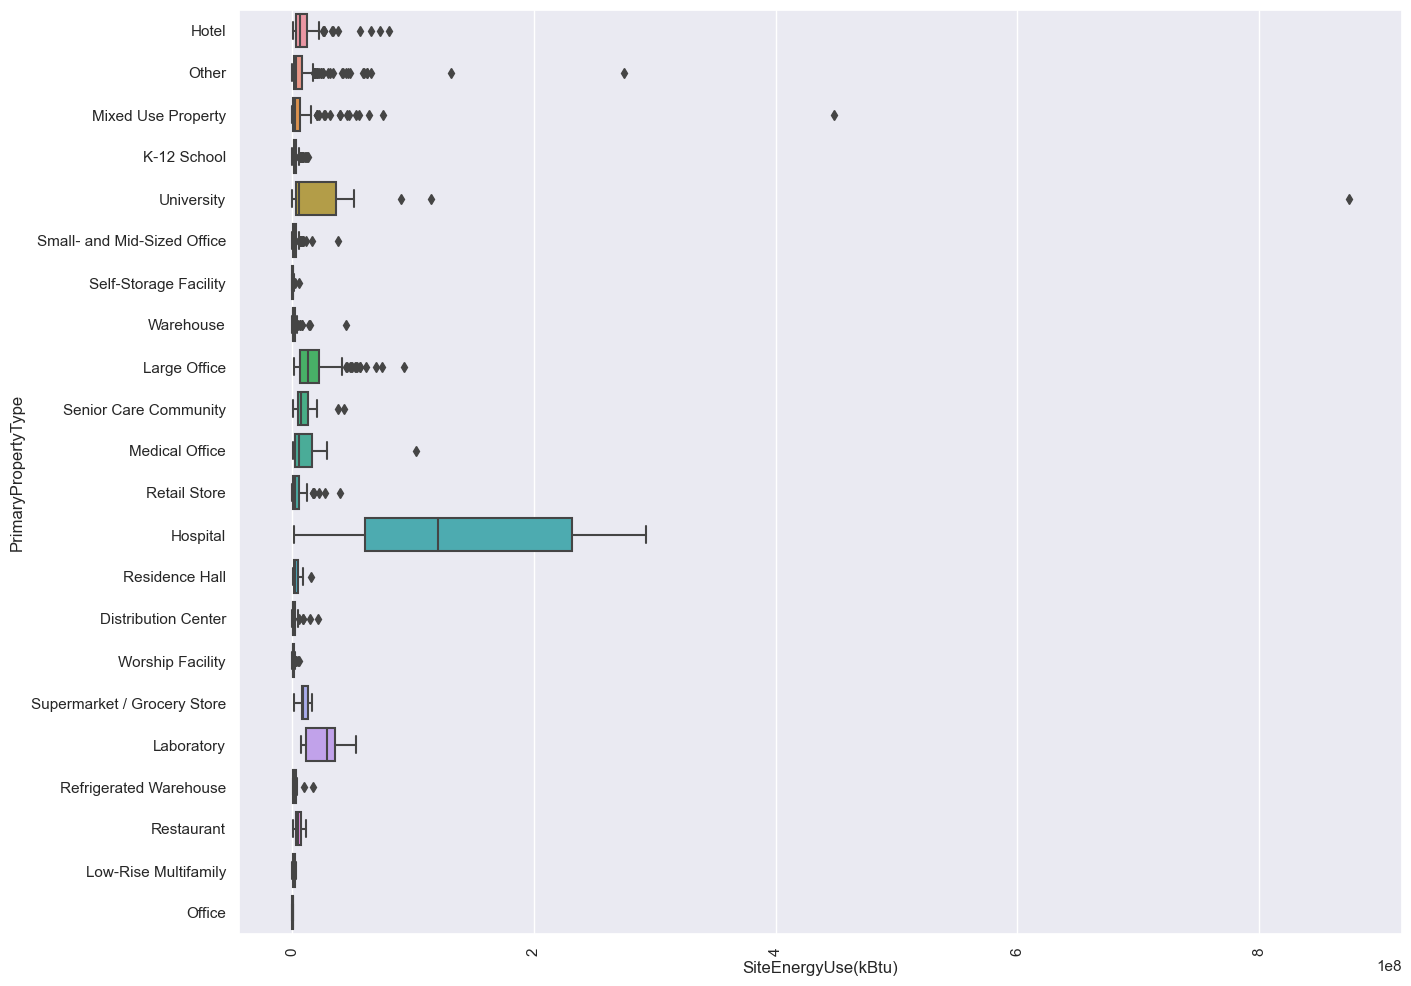

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle ZipCode


<Figure size 1000x600 with 0 Axes>

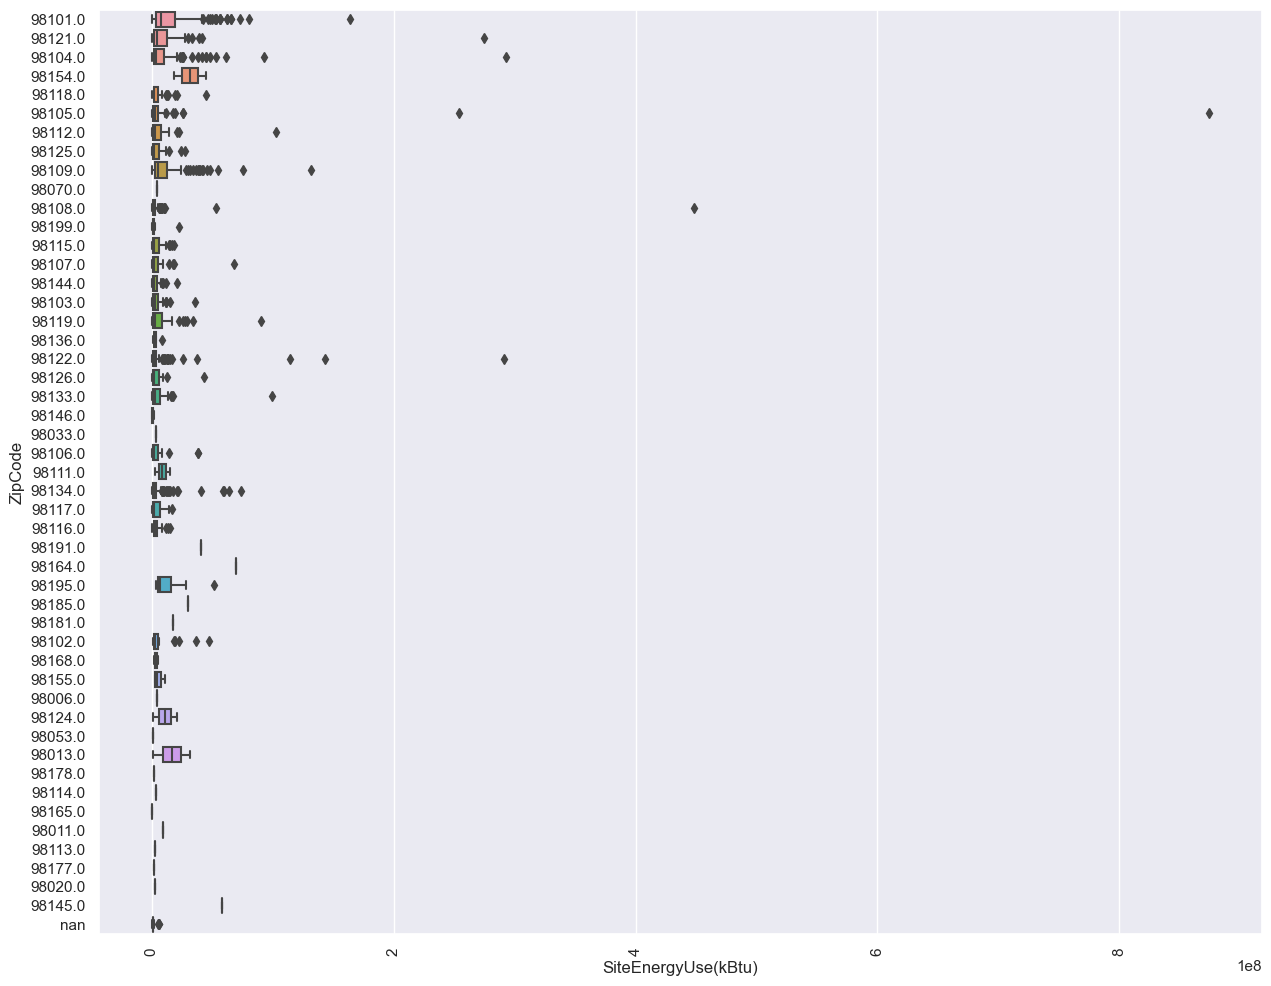

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle CouncilDistrictCode


<Figure size 1000x600 with 0 Axes>

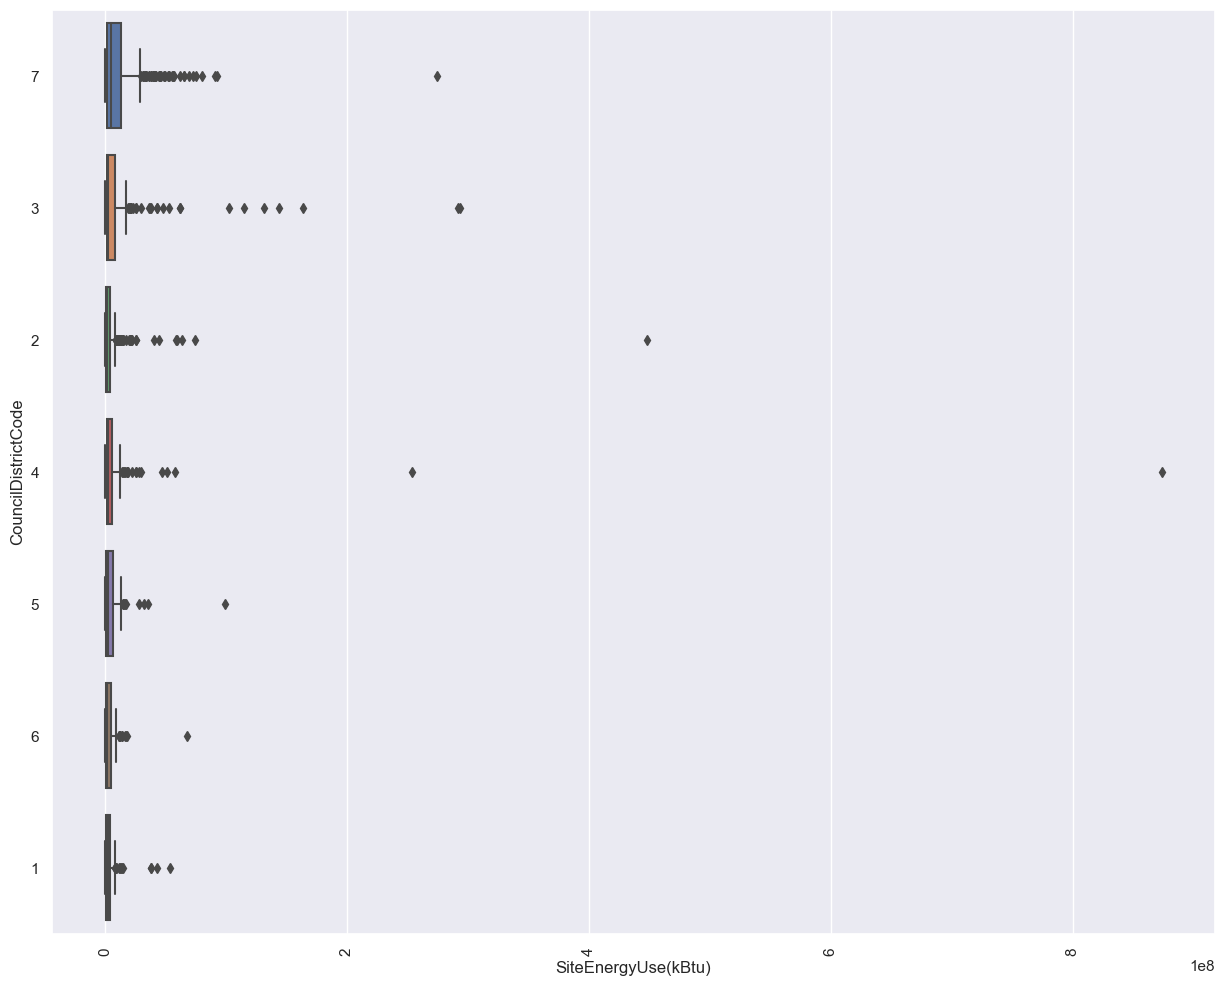

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle Neighborhood


<Figure size 1000x600 with 0 Axes>

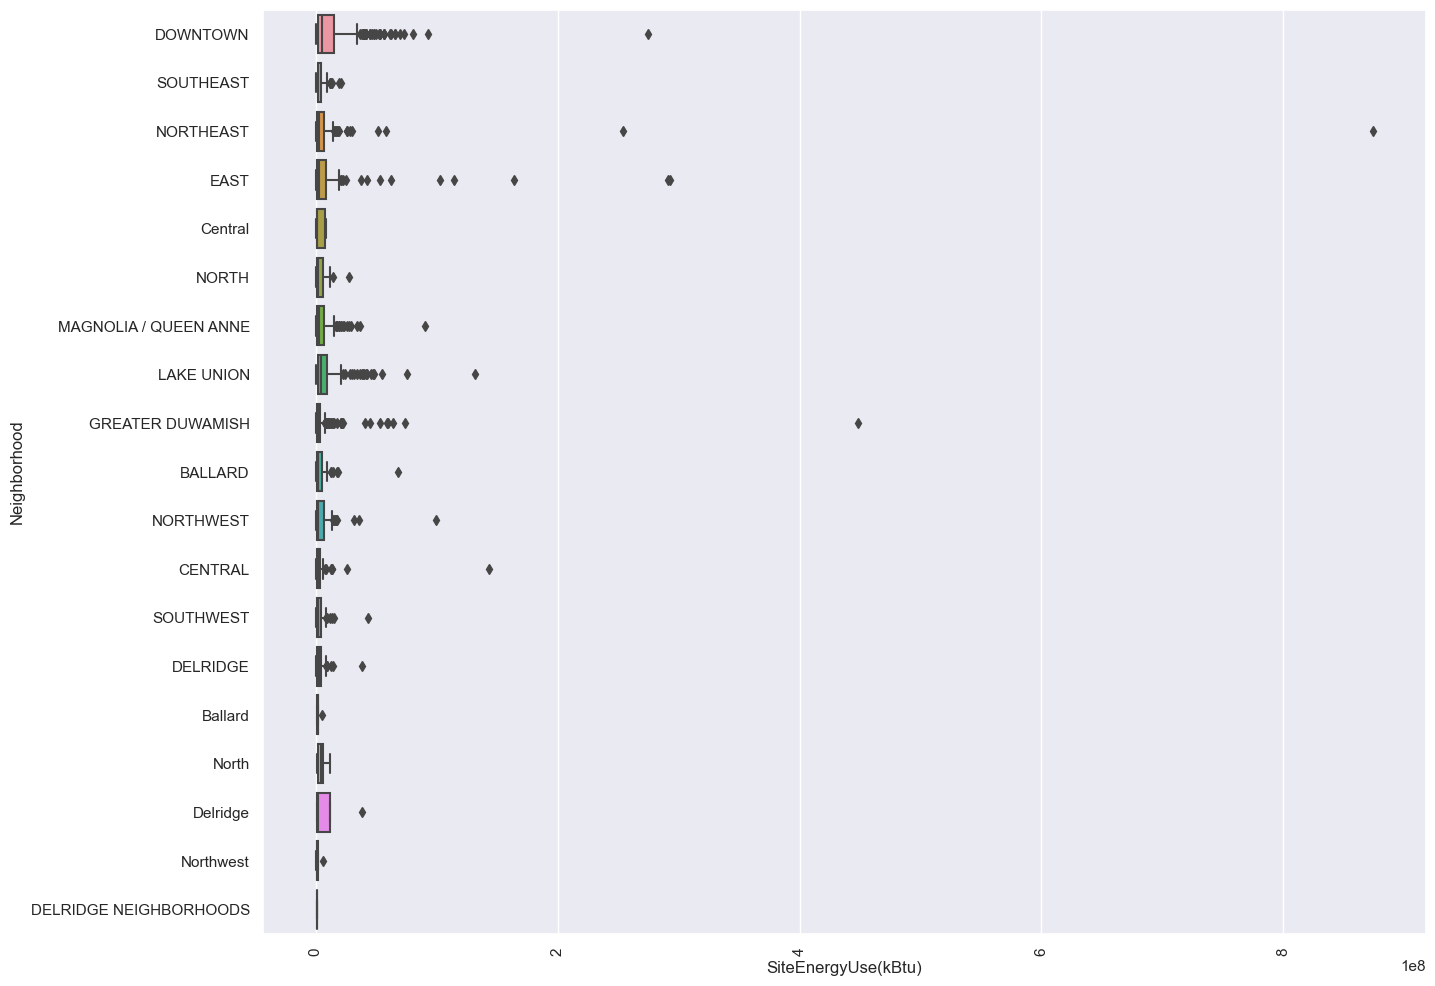

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle YearBuilt


<Figure size 1000x600 with 0 Axes>

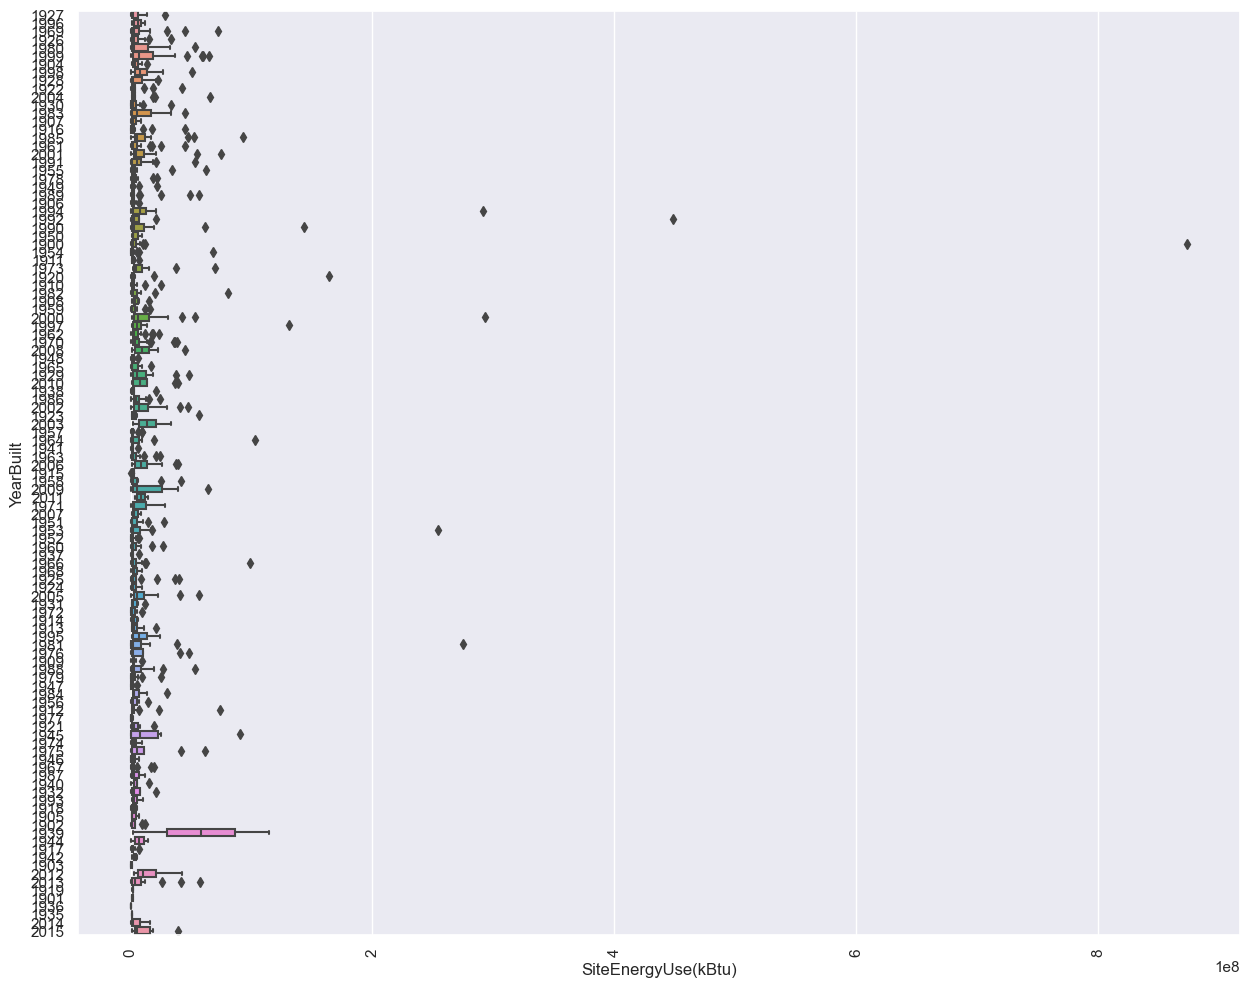

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle LargestPropertyUseType


<Figure size 1000x600 with 0 Axes>

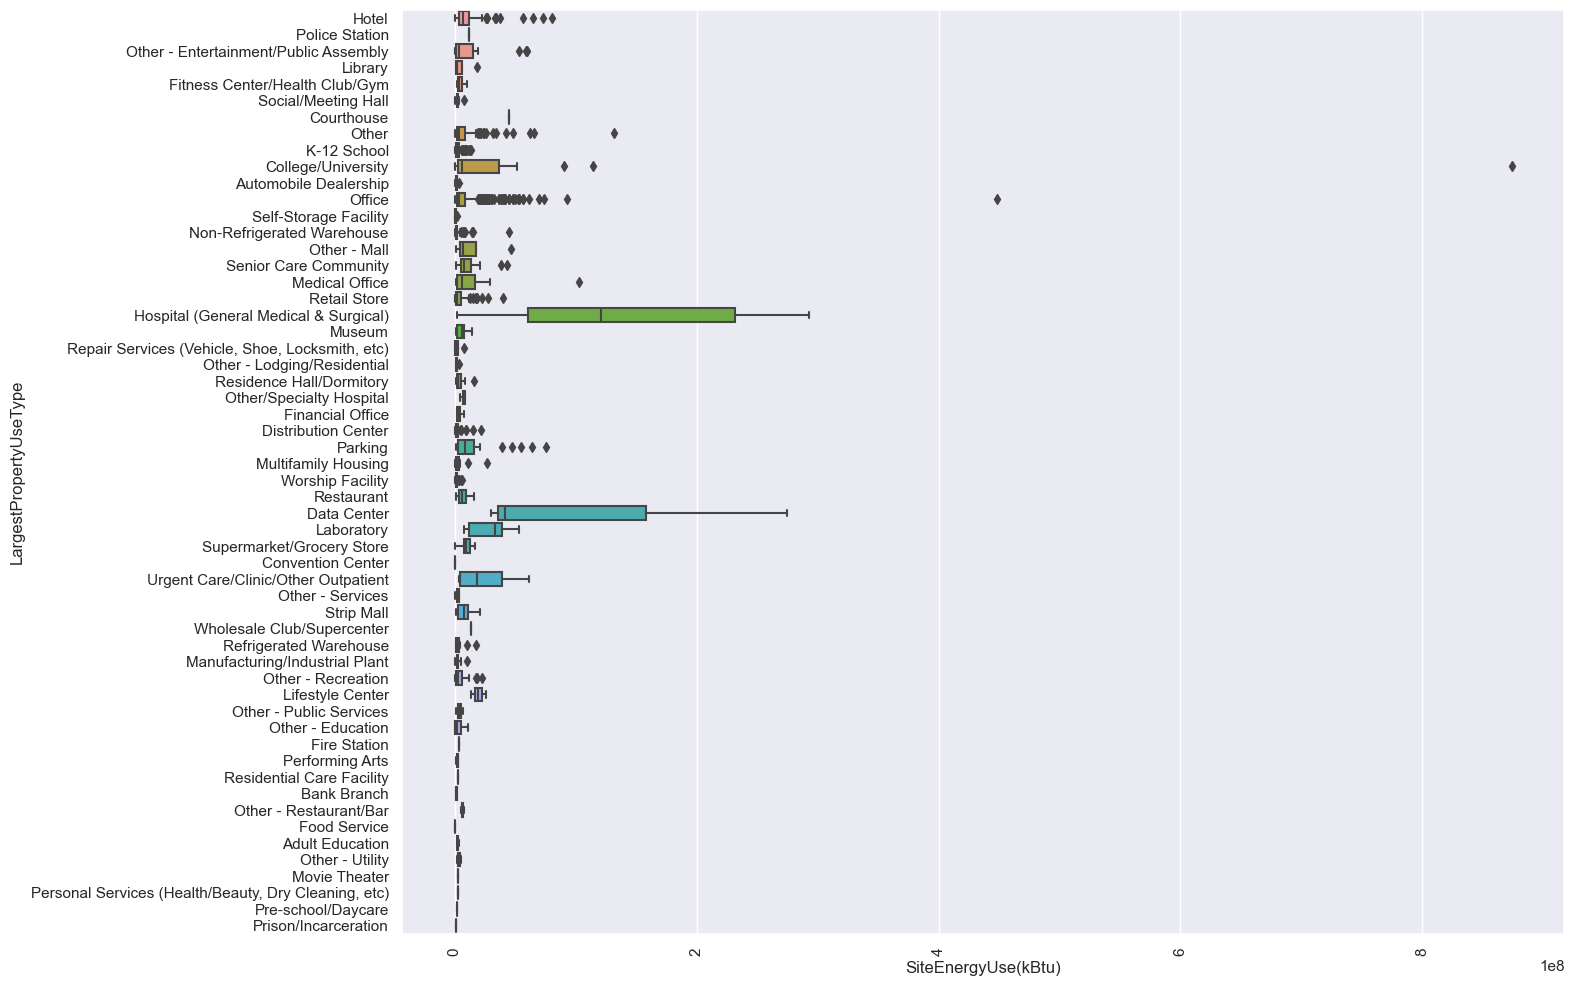

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle SecondLargestPropertyUseType


<Figure size 1000x600 with 0 Axes>

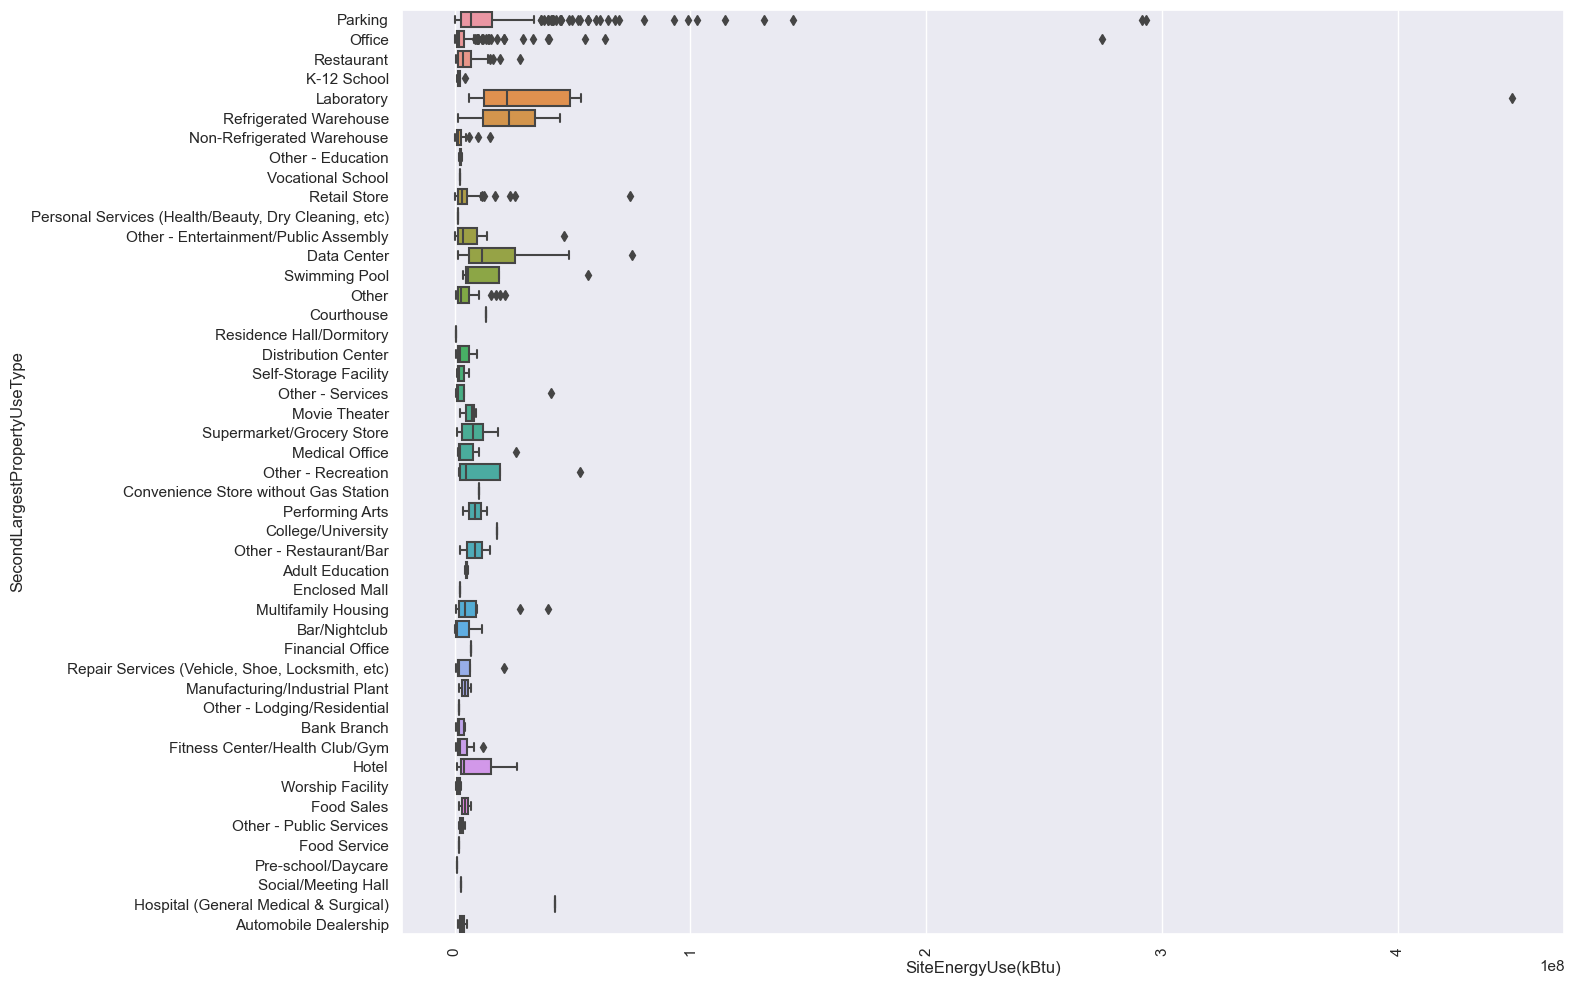

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle ThirdLargestPropertyUseType


<Figure size 1000x600 with 0 Axes>

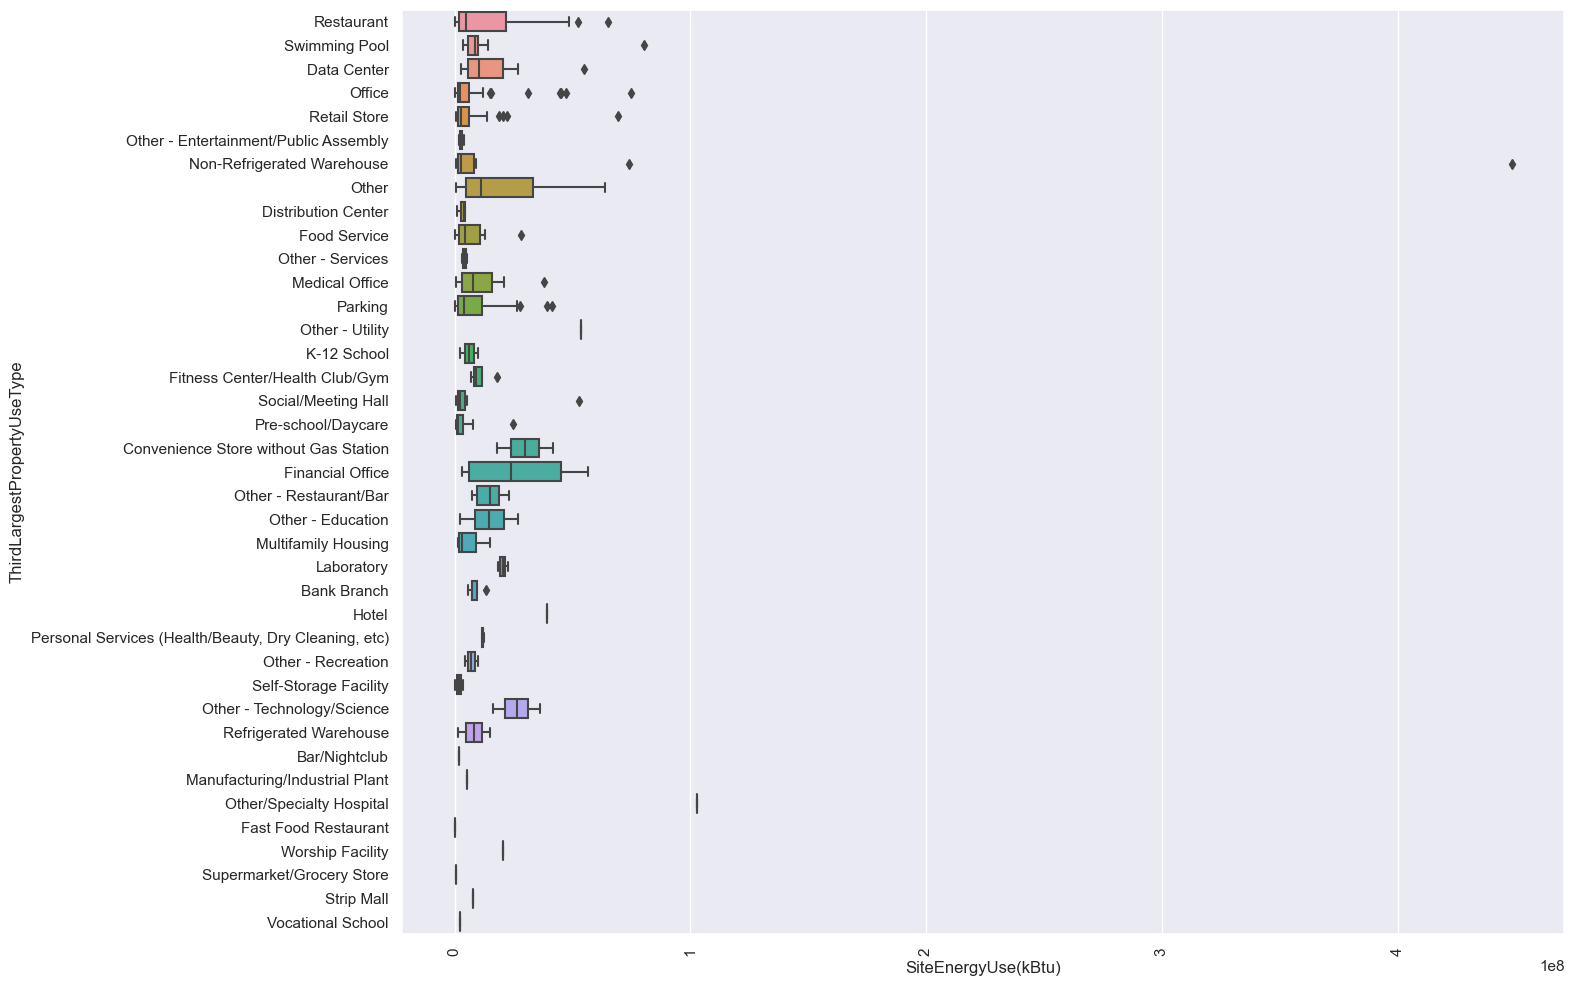

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle YearsENERGYSTARCertified


<Figure size 1000x600 with 0 Axes>

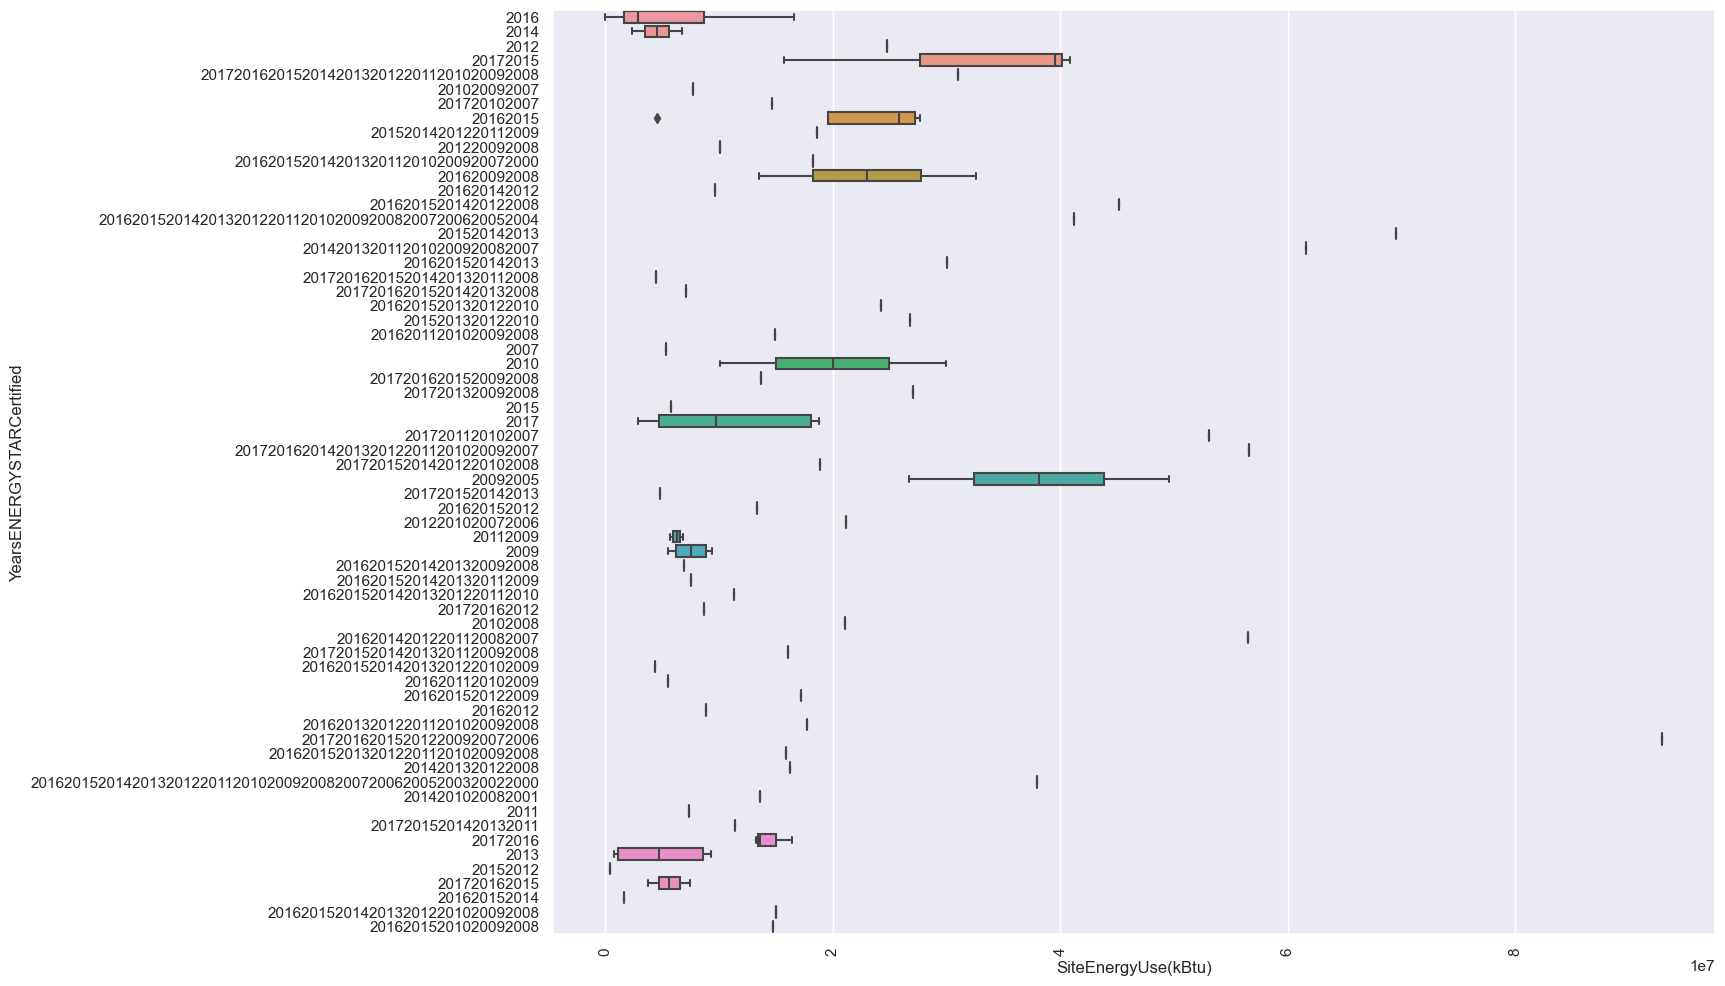

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle ComplianceStatus


<Figure size 1000x600 with 0 Axes>

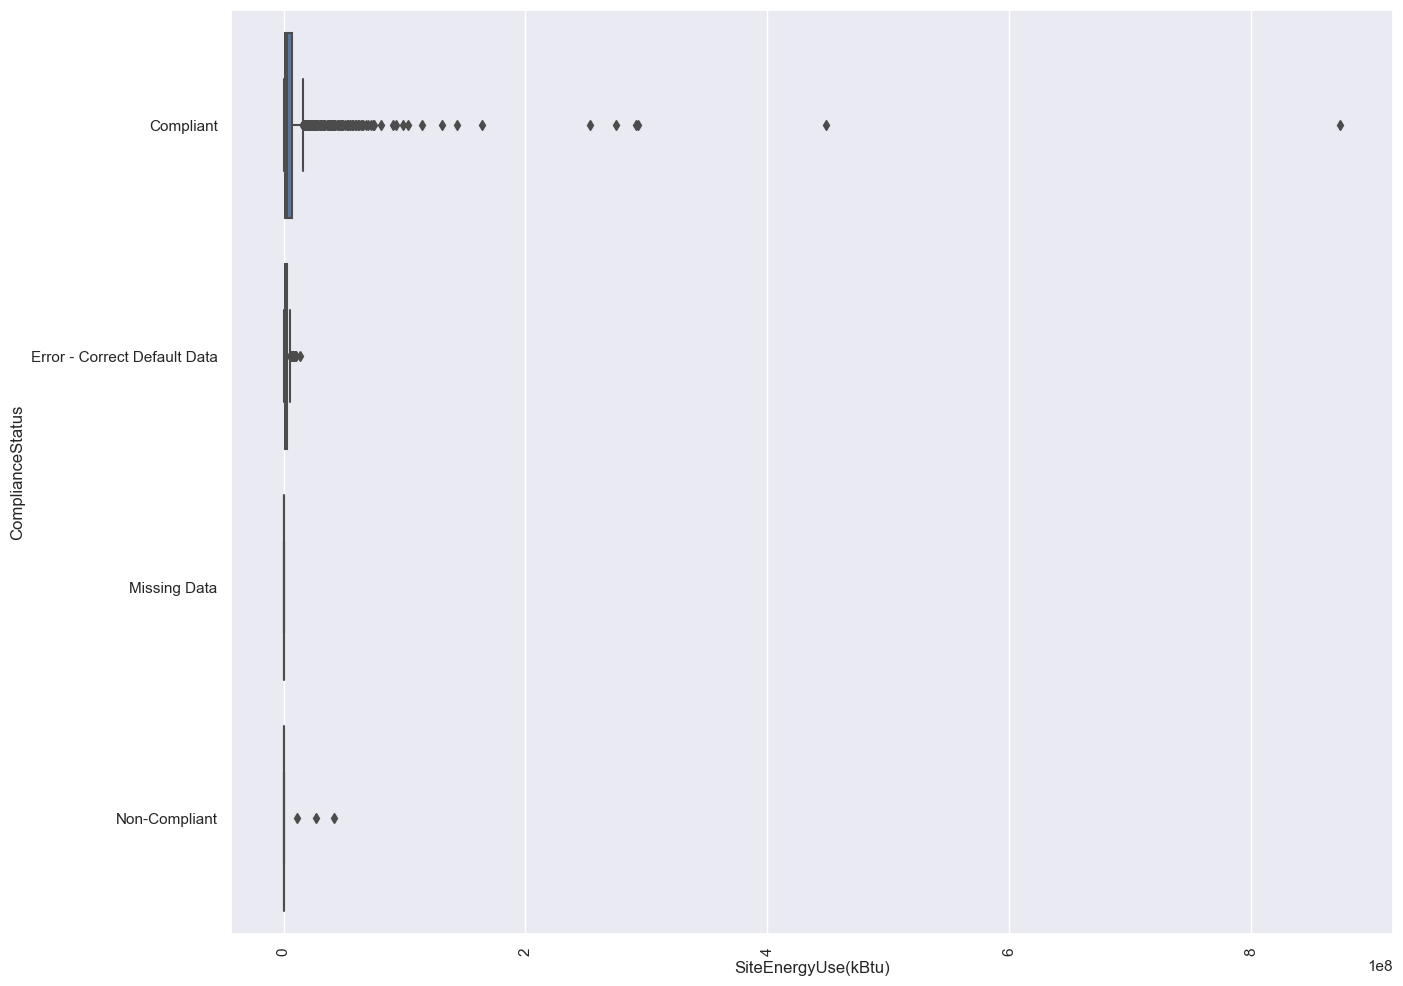

Analyse sur colonne numérique SiteEnergyUse(kBtu) et catégorielle Outlier


<Figure size 1000x600 with 0 Axes>

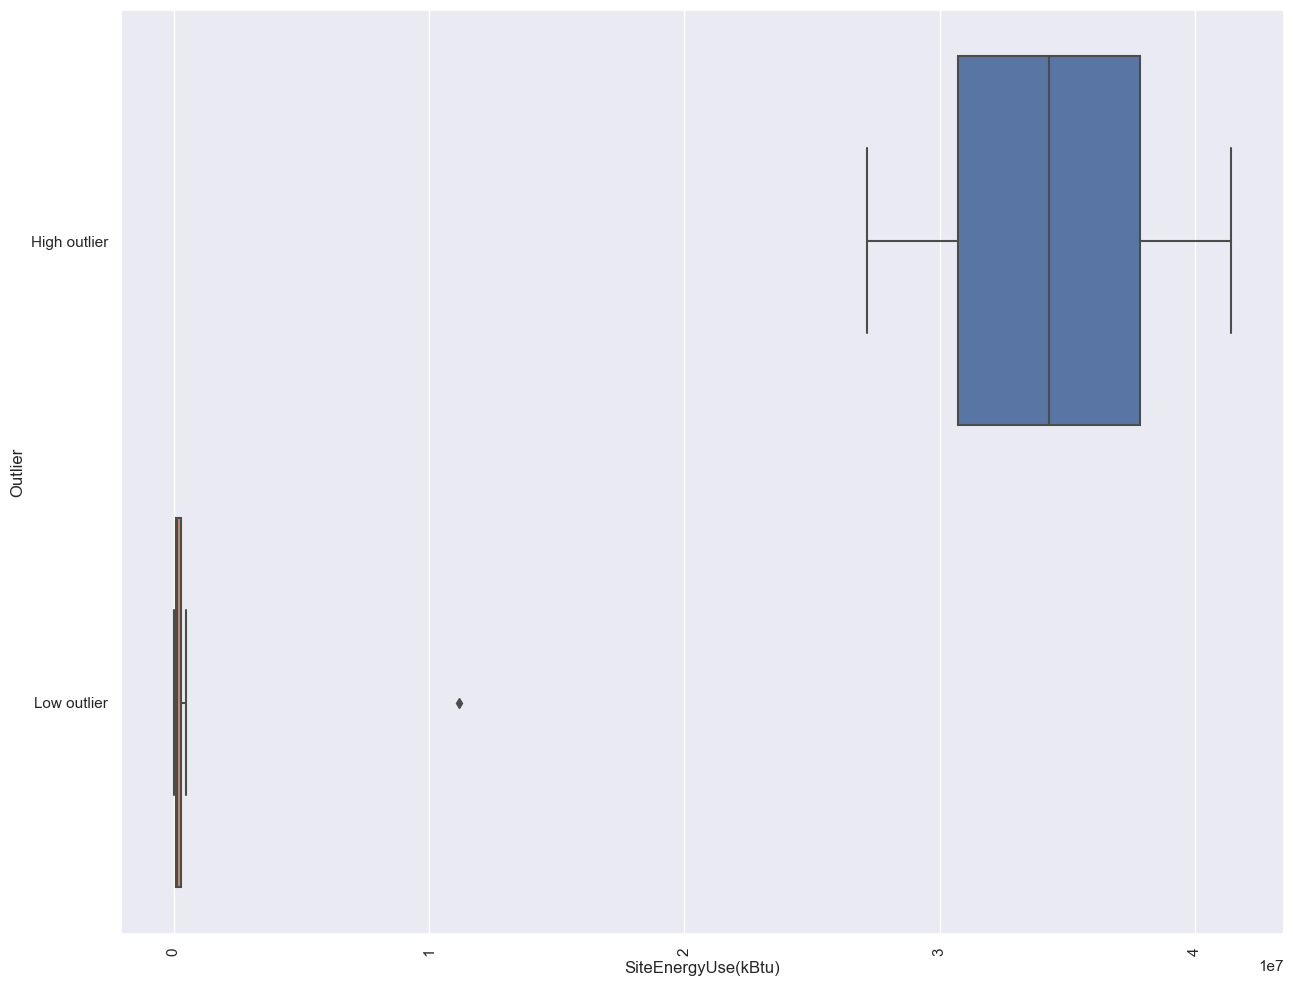

In [40]:
 # Affichage des distributions sur les colonnes numériques avec la consommation d'énergie
for cat_column in cat_cols:
    show_num_cat_distribution(building_consumption, "SiteEnergyUse(kBtu)", cat_column)

<Figure size 1000x600 with 0 Axes>

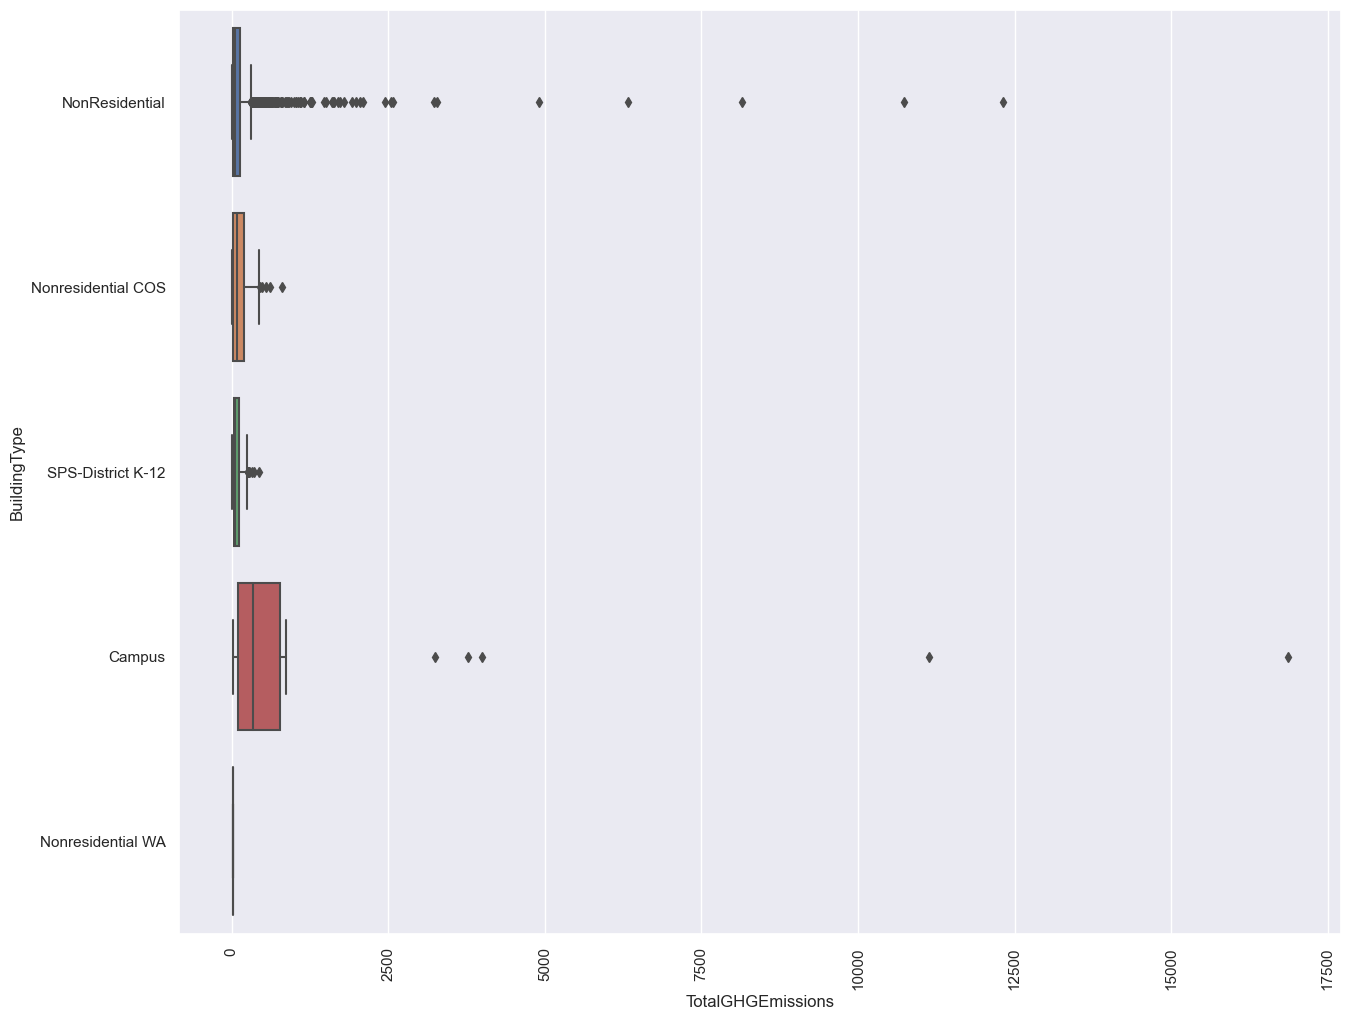

In [41]:
plt.figure(figsize=(10,6))
# Création du countplot de base
plt.figure(figsize=(15,12))
ax = sns.boxplot(x="TotalGHGEmissions", y="BuildingType", data=building_consumption)
ax.tick_params(axis='x', rotation=90)
plt.show()

### Distribution de la colonne SiteEnergyUse(kBtu) avec les attributs numériques

In [42]:
def show_energie_consumption_cat_distribution(df, num_col):
    print(f"Analyse sur colonne numérique {num_col} et SiteEnergyUse(kBtu) ")
    plt.figure(figsize=(10,6))
    sns.set_theme()
    
    # Création du countplot de base
    plt.figure(figsize=(12,8))
    ax = sns.relplot(data=df, x=num_col, y="SiteEnergyUse(kBtu)")
    ax.tick_params(axis='x', rotation=90)
    plt.show()

Analyse sur colonne numérique NumberofBuildings et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

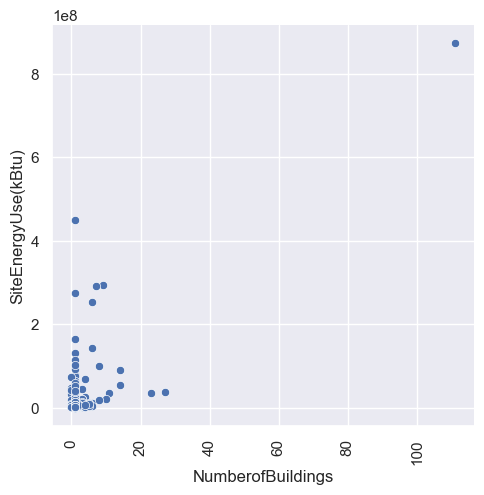

Analyse sur colonne numérique NumberofFloors et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

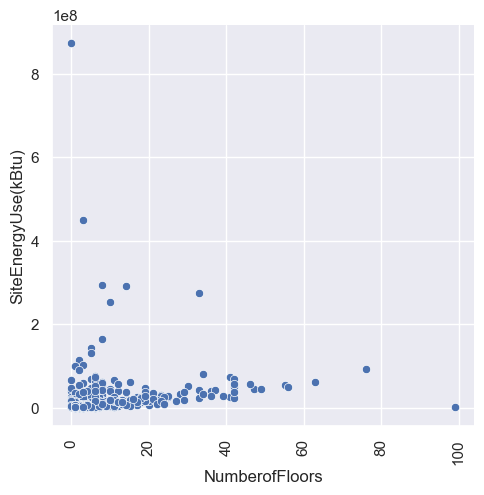

Analyse sur colonne numérique PropertyGFATotal et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

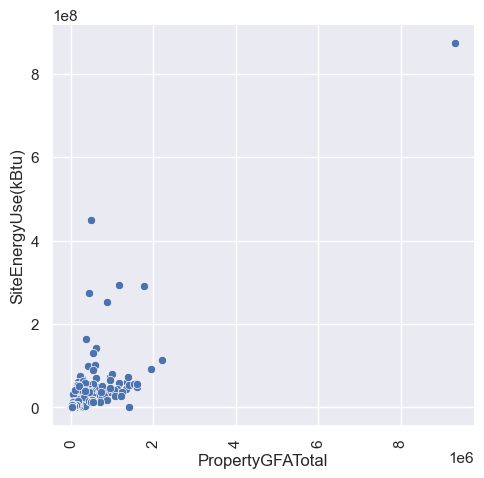

Analyse sur colonne numérique PropertyGFAParking et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

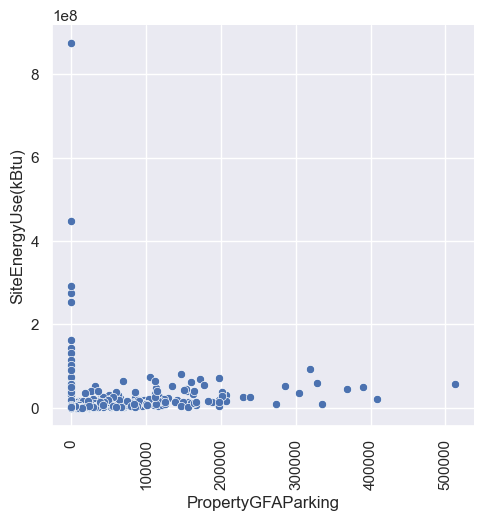

Analyse sur colonne numérique PropertyGFABuilding(s) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

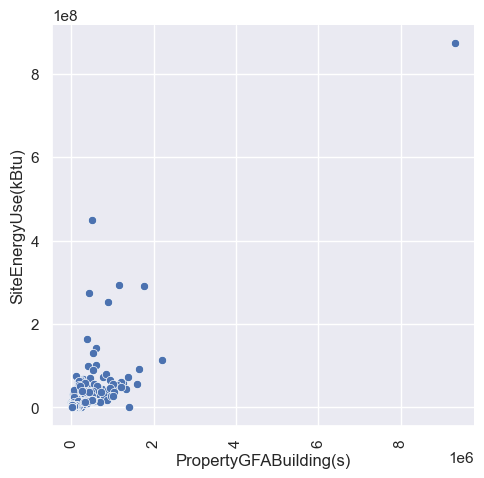

Analyse sur colonne numérique LargestPropertyUseTypeGFA et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

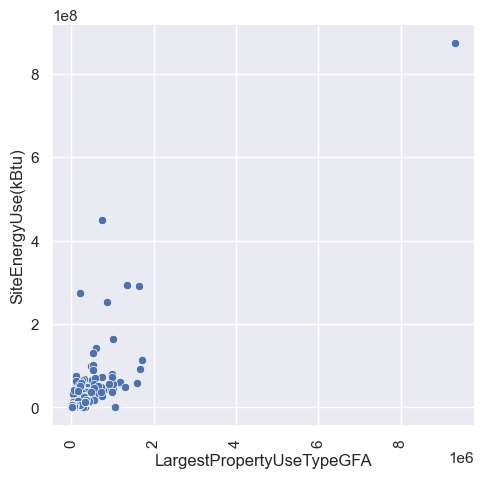

Analyse sur colonne numérique SecondLargestPropertyUseTypeGFA et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

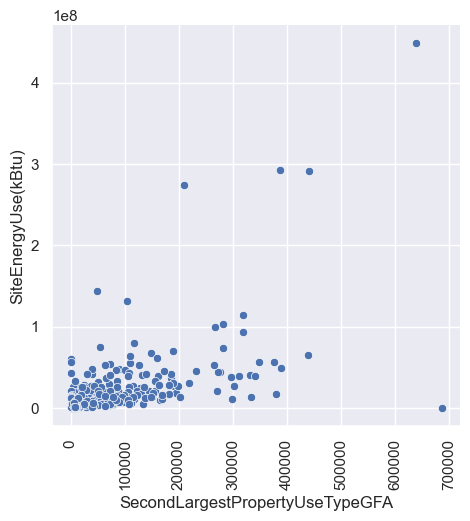

Analyse sur colonne numérique ThirdLargestPropertyUseTypeGFA et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

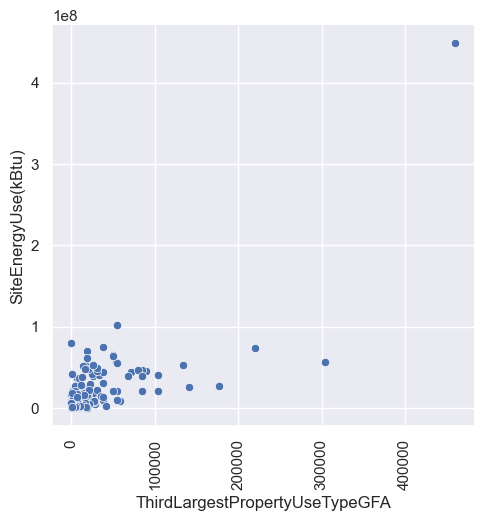

Analyse sur colonne numérique ENERGYSTARScore et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

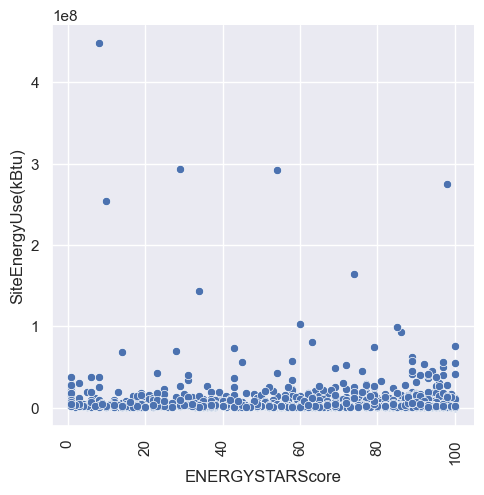

Analyse sur colonne numérique SiteEUI(kBtu/sf) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

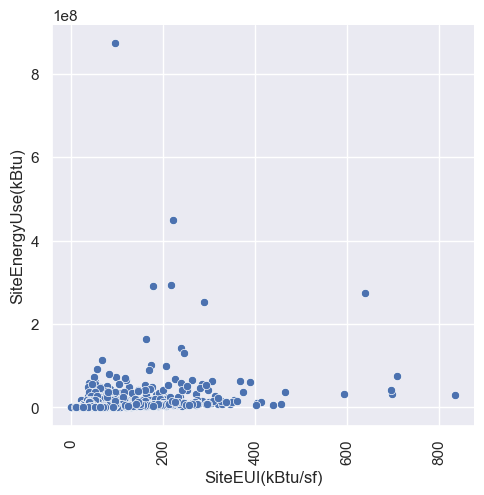

Analyse sur colonne numérique SiteEUIWN(kBtu/sf) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

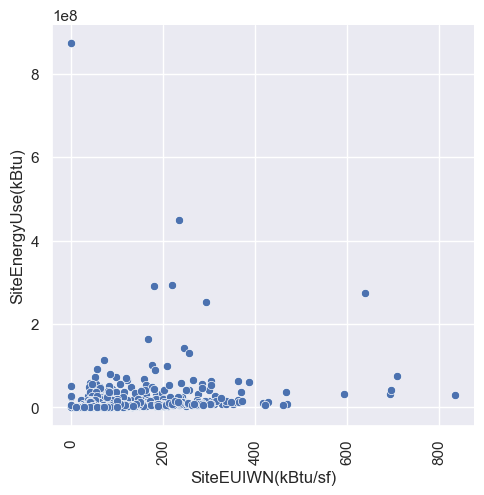

Analyse sur colonne numérique SourceEUI(kBtu/sf) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

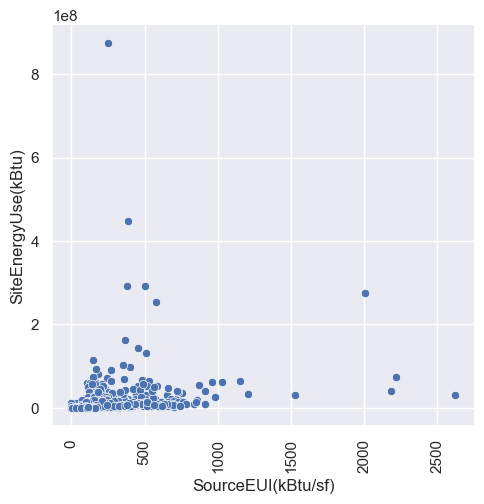

Analyse sur colonne numérique SourceEUIWN(kBtu/sf) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

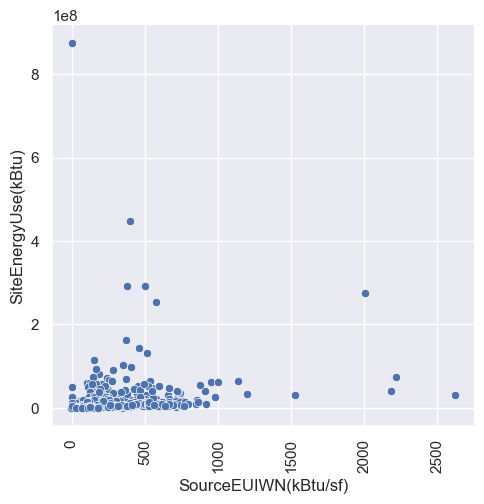

Analyse sur colonne numérique SiteEnergyUse(kBtu) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

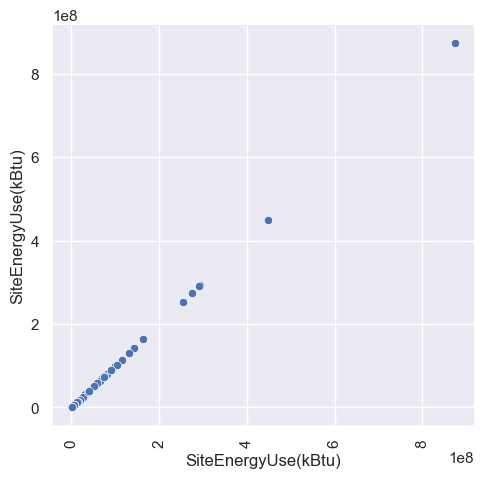

Analyse sur colonne numérique SiteEnergyUseWN(kBtu) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

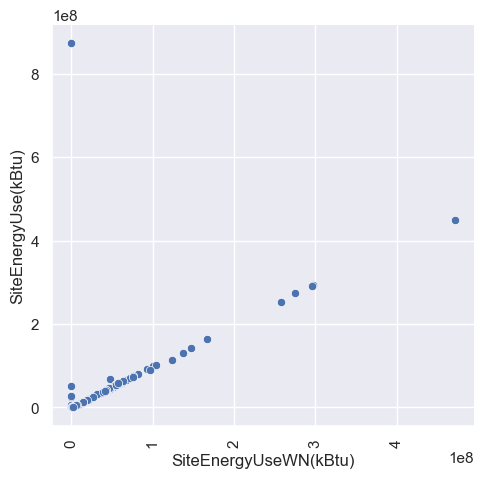

Analyse sur colonne numérique SteamUse(kBtu) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

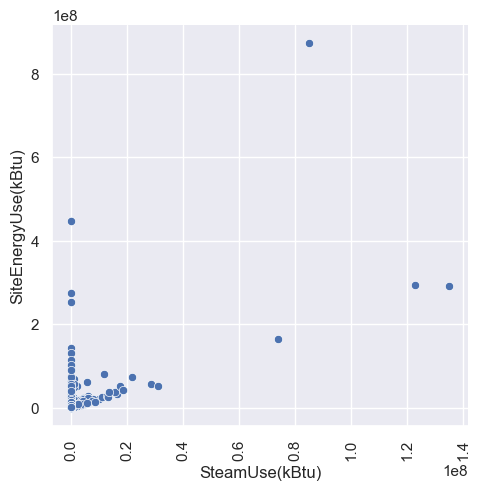

Analyse sur colonne numérique Electricity(kWh) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

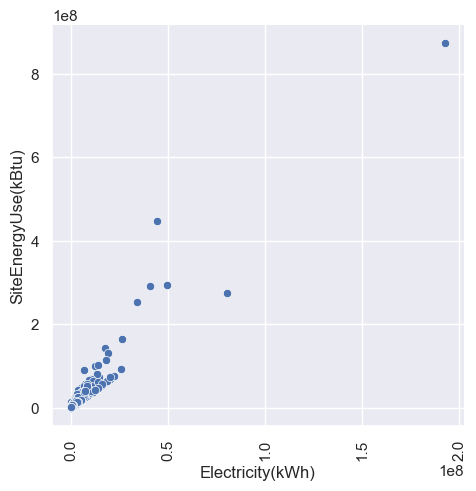

Analyse sur colonne numérique Electricity(kBtu) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

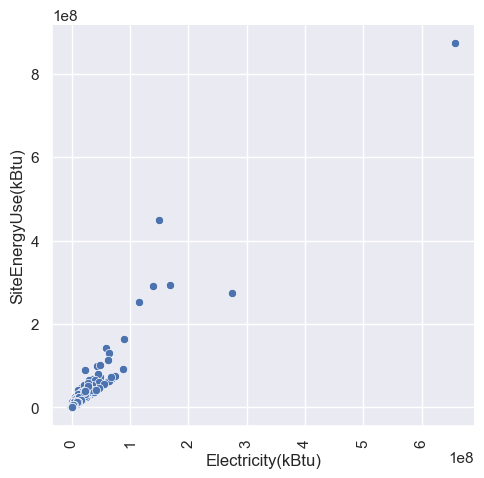

Analyse sur colonne numérique NaturalGas(therms) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

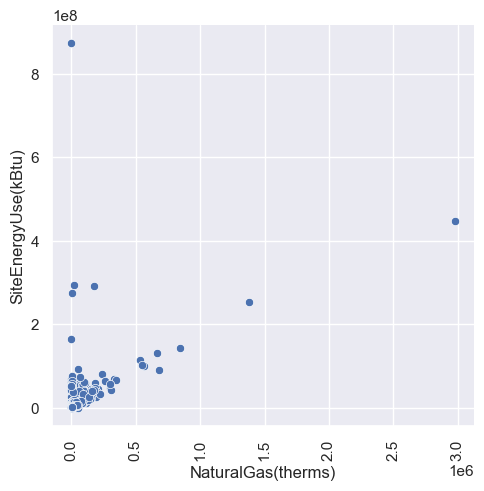

Analyse sur colonne numérique NaturalGas(kBtu) et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

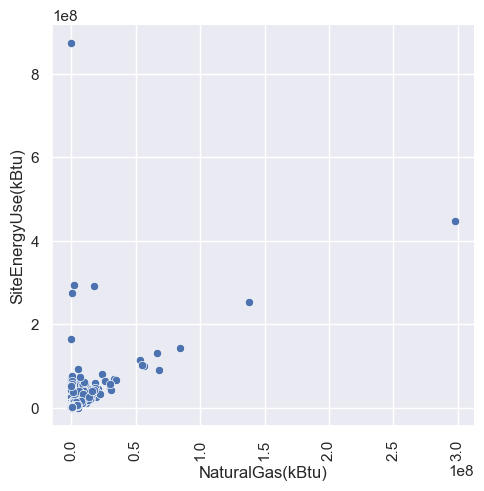

Analyse sur colonne numérique TotalGHGEmissions et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

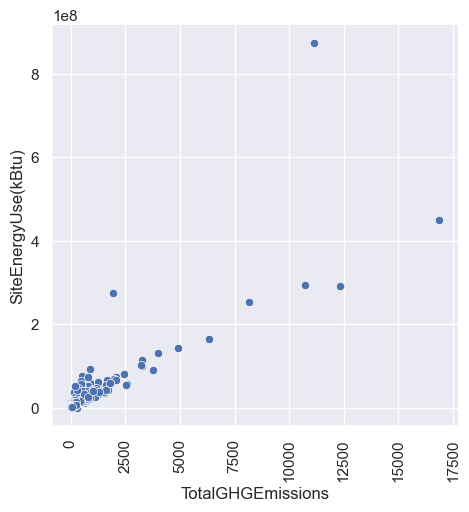

Analyse sur colonne numérique GHGEmissionsIntensity et SiteEnergyUse(kBtu) 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

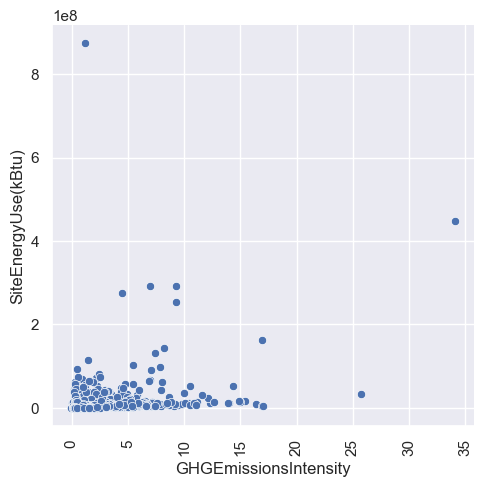

In [43]:
 # Affichage des distributions sur les colonnes numériques avec la consommation d'énergie
for num_column in numerical_columns:
    show_energie_consumption_cat_distribution(building_consumption, num_column)